In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import datetime
from matplotlib import rcParams
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

In [2]:
[x for x in dir(FontProperties) if not x.startswith("_")]

['copy',
 'get_family',
 'get_file',
 'get_fontconfig_pattern',
 'get_math_fontfamily',
 'get_name',
 'get_size',
 'get_size_in_points',
 'get_slant',
 'get_stretch',
 'get_style',
 'get_variant',
 'get_weight',
 'set_family',
 'set_file',
 'set_fontconfig_pattern',
 'set_math_fontfamily',
 'set_name',
 'set_size',
 'set_slant',
 'set_stretch',
 'set_style',
 'set_variant',
 'set_weight']

# 测试数据

In [3]:
filep = r".\datasource\testdata.csv"
data = pd.read_csv(filep,index_col="trade_date",parse_dates=True)
data.sort_index(ascending=True,inplace=True)

In [4]:
data.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2021-03-19,000009.SZ,8.70,8.78,8.65,8.76,8.71,0.05,0.5741,321843.00,280668.282
2021-03-22,000009.SZ,8.74,8.99,8.71,8.92,8.76,0.16,1.8265,311235.89,276282.075
2021-03-23,000009.SZ,8.93,9.05,8.81,8.98,8.92,0.06,0.6726,348621.36,311317.646
2021-03-24,000009.SZ,8.95,9.48,8.93,9.28,8.98,0.30,3.3408,641464.66,595411.230
2021-03-25,000009.SZ,9.28,9.28,9.03,9.15,9.28,-0.13,-1.4009,283238.10,258251.804


# matplotlib 原理
    1.matplotlib 三层API
        matplotlib.backend_bases.FigureCanvas 代表了绘图区，所有的图像都是在绘图区完成的
        matplotlib.backend_bases.Renderer 代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。
        matplotlib.artist.Artist 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。
        前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图
    2.Artist 的分类
        primitive是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文字text，矩形Rectangle，图像image等。
        container是容器，即用来装基本要素的地方，包括图形figure、坐标系Axes和坐标轴Axis。

# matplotlib 画图流程
    1.创建一个Figure实例
    2.使用Figure实例创建一个或者多个Axes或Subplot实例
    3.使用Axes实例的辅助方法来创建 Artist的primitive,或者更新container

# 基图&子图的创建方式:

## 基图:

In [13]:
fig = plt.figure(
                    figsize=(14,8),    #default: [6.4, 4.8], Figure dimension (width, height) in inches.
                    dpi=100,           #float, default: 100.0: 分辨率
                    facecolor="green", #rcParams["figure.facecolor"]
                    edgecolor="red", #同facecolor
                    linewidth=8,       #float, 边框线的宽度
                    frameon=True,      #bool, 表示是否绘制窗口的图框，如果是False，图形将完全盖住画板，即画板的颜色，边框都看不到了；
                    subplotpars=None,  #子图参数:default rcParams["figure.subplot.*"]
                    tight_layout=True, #bool or dict, default: rcParams["figure.autolayout"] (default: False)
                                        #If False use subplotpars. If True adjust subplot parameters using tight_layout with default padding. When providing a dict containing the keys pad, w_pad, h_pad, and rect, the default tight_layout paddings will be overridden.
                    constrained_layout=False,  ## If True use constrained layout to adjust positioning of plot elements. Like tight_layout, but designed to be more flexible. See Constrained Layout Guide for examples. (Note: does not work with subplot() or subplot2grid().) Defaults to rcParams["figure.constrained_layout.use"] (default: False).
                                         )

# ax = fig.add_subplot()
print("画布在jupyter无法显示,但在notepad++里可以...")

画布在jupyter无法显示,但在notepad++里可以...


<Figure size 1400x800 with 0 Axes>

# 添加子图:

## 方式一:plt.subplot()
    plt.subplot():可以快速的画图,但是无法设置axes的大小,这里仅做参考;它的参数同fig.add_subplot()
    返回Axes,所以参数见Axes的属性及方法

<AxesSubplot:title={'center':'t1'}, xlabel='plot1', ylabel='frequency'>

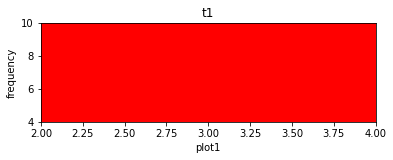

In [6]:
plt.subplot(211,facecolor='r',xlabel="plot1",ylabel='frequency',xlim=(2,4),ylim=(4,10),title="t1")

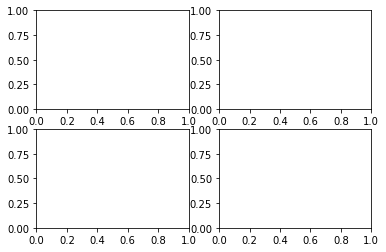

In [3]:
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax3 = plt.subplot(224)

<AxesSubplot:>

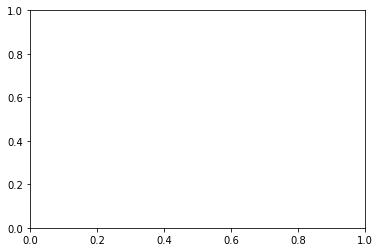

In [16]:
plt.subplot()

## 方法二: fig.add_subplot()

'add_subplot'

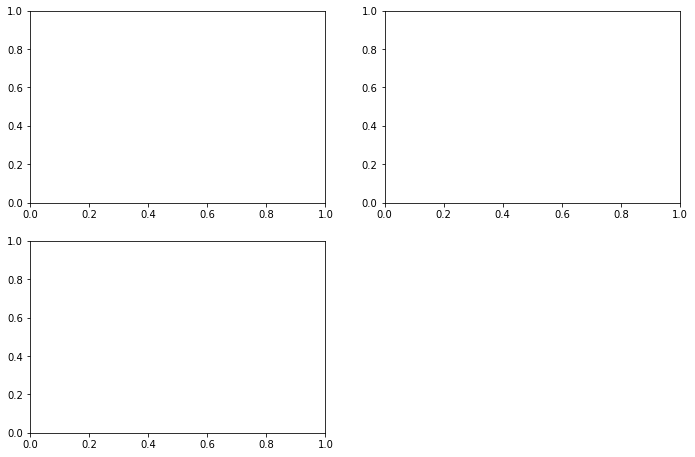

In [21]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(
   331,

    )
ax2 = fig.add_subplot(
    332,

    )
ax3 = fig.add_subplot(
    334,           #221:将画布划分成2行,2列,该子图位于第一个
    projection=None,    #None，'aitoff'、'hammer'、'lambert'、'mollweide'、'polar'、'rectlinear'、str，可选
#     polar=True,        #bool，默认值：False:如果为真，则相当于投影='polar'。
    label="add_subplot",    #子图的名称,这个标签不是显示在图上的,可以通过 ax3.get_label()获取
    sharex=ax1,
    sharey=ax1,         #Axes, optional:和另一个子图共享,具有相同的limits,ticks,scale;还是都会显示.

    #Axis基类的关键字参数
    adjustable='box',       #'box'、'datalim'
#     # agg_filter=,            #一种过滤函数，它接受一个（m，n，3）浮点数组和一个dpi值，并返回一个（m，n，3）数组。
    alpha=0.6,  #           #float,None
    anchor='sw',                #2-浮点数或,'NW':上左; 'N':上中; 'NE':上右; 'W':左中; c':居中、'E': 右中; 'sw':左下;'s':下中、'se':右下
#     animated=False,         #布尔, 动画状态
    aspect="auto",                #{auto}或num:设置轴缩放的纵横比，即Y单位与X单位的比率。
    autoscale_on=False,     #布尔
    autoscalex_on=False,    #布尔
#     autoscaley_on=False,    #布尔
#     # axes_locator=,          #	可赎回的 [[轴，渲染器]] Bbox
#     axisbelow=False,        #	布尔或“线”
#     box_aspect=False,       #	没有，或者是一个数字
#     # clip_box=,              #	Bbox
#     clip_on=False,          #	布尔
#     # clip_path=,             #	面片或（路径、变换）或无
#     # contains=,              #	未知的
#     facecolor='y',  
#     # c='b',                  #facecolor 或fc	颜色
#     # figure=,                #	Figure
#     frame_on=False,         #	布尔
#     # gid=,                   #	STR
#     in_layout=False,        #	布尔
#     navigate=False,         #	布尔
#     # navigate_mode=,         #	未知的
#     # path_effects=,              #	AbstractPathEffect
#     picker=None,                #	无、布尔或可呼叫
#     # position=,              #	[左、下、宽、高] 或 Bbox
#     # prop_cycle=,            #	未知的
#     rasterization_zorder=None,  #	浮动或无
#     # rasterized	布尔或无
#     # sketch_params=,         #	（比例：浮动，长度：浮动，随机性：浮动）
#     snap=False,             #	布尔或无
#     title='tst',            #	STR
#     # transform=,             #	Transform
#     url='https://www.baidu.com/',   #svg格式有效
#     visible=True,           #	布尔
#     # xbound=,                #	未知的
#     xlabel="subplot_x",
#     xlim=(1,6),
#     xmargin=0.3,            #	float, >-0.5
#     xscale="linear",        #	“Linear”，“Log”，“SymLog”，“Logit”，…
#     # xticklabels=,           #	未知的
#     # xticks=,                #	未知的
#     # ybound=,                #	未知的
#     ylabel="subplot_y",
#     ylim=(5,100),
#     ymargin=0.2,            #	float, >-0.5
#     yscale="Linear",        #	“Linear”，“Log”，“SymLog”，“Logit”，…
#     # yticklabels=,           #	未知的
#     # yticks=,                #	未知的
#     zorder=2.4,             #float,
    )


ax3.get_label()

In [48]:
data.head(2)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2021-03-19,000009.SZ,8.70,8.78,8.65,8.76,8.71,0.05,0.5741,321843.00,280668.282
2021-03-22,000009.SZ,8.74,8.99,8.71,8.92,8.76,0.16,1.8265,311235.89,276282.075


In [66]:
import seaborn as sns

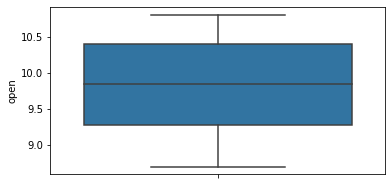

In [83]:
ax = sns.boxplot(data=data,
                y="open")
ax.set_box_aspect(0.5)
ax.set_alpha(0.1)

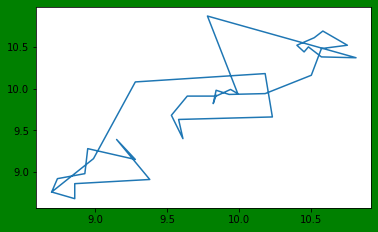

In [5]:
fig = plt.figure(figsize=(6,4),facecolor='green')
ax1 = fig.add_subplot(projection=None,label='axes1',
                      # adjustable='box',\
                      alpha=0.02,
                      # facecolor='red',
                      autoscale_on=True,
                      # animated=True,
                      box_aspect=0.6,
                     )

ax1.plot(data['open'],data['close'])

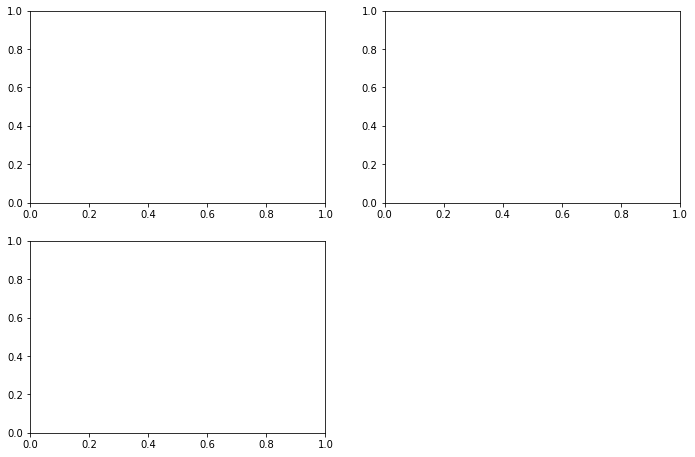

In [58]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)

ax4 = fig.add_subplot(334)

ax3.set_adjustable(
    adjustable="box",     #设置轴如何调整以达到所需的纵横比。'box':更改axes的物理尺寸; 'datalim': 更改x或者y数据限制;  
    share=True,           #bool, default:False, True:将设置应用到所有共享轴
    )

# ax3.set_agg_filter(filter_func=(m,n,3))  #一种过滤函数

ax3.set_alpha(alpha=0.6)   #不支持所有后端

ax3.set_anchor(anchor="C",    #2-浮点数或,'NW':上左; 'N':上中; 'NE':上右; 'W':左中; c':居中、'E': 右中; 'sw':左下;'s':下中、'se':右下
               share=True,    #bool, default:False, True:将设置应用到所有共享轴
              )

ax3.set_animated(b=True,    #设置axes动画状态
                )

ax3.set_aspect(aspect=0.5,   #{'auto', 'equal'} or float: 'auto':用数据填充位置矩形; 'equal':x,y相同比例 
#                adjustable='box', #同ax3.set_adjustable参数
#                anchor='C',       #同ax3.set_anchor
               share=True,       #bool, default:False, True:将设置应用到所有共享轴               
              )

ax3.set_autoscale_on(b=True)  #设置是否对绘图命令应用自动缩放

ax3.set_autoscalex_on(b=True)  #设置是否对绘图命令应用自动缩放

ax3.set_autoscaley_on(b=True)  #设置是否对绘图命令应用自动缩放

ax3.set_axes_locator(locator='Bbox',)  #设置axes位置

ax3.set_axisbelow(b=True)        #bool, 图上有网格线, 图是要在网格线上方,还是下方;

ax3.set_box_aspect(aspect=0.2,)

## 方法三:plt.subplots()

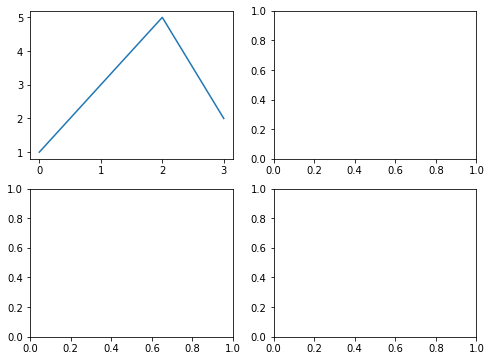

In [6]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].plot([1,3,5,2])

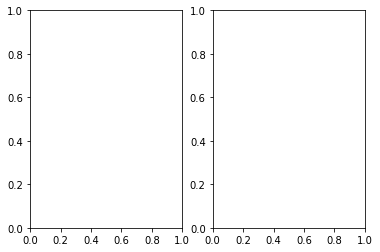

In [7]:
fig, (ax1,ax2) = plt.subplots(1, 2)

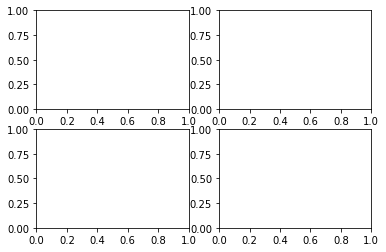

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

## 子图布局方式方法:

### subplots:

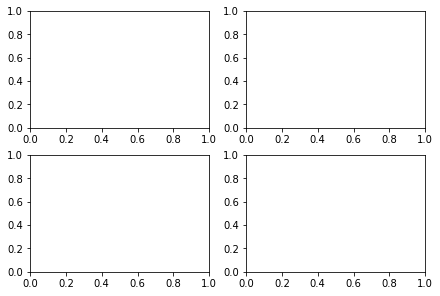

In [3]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

### gridspec

In [5]:
import matplotlib.gridspec as gridspec

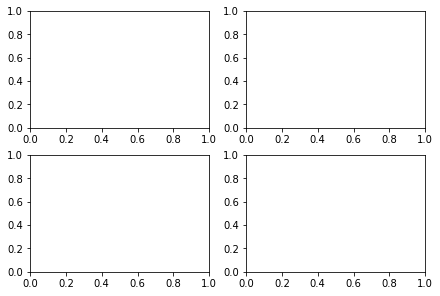

In [8]:
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

# 这个不是Gridspec的优势,下面才是

Text(0.5, 1.0, 'gs[-1, -2]')

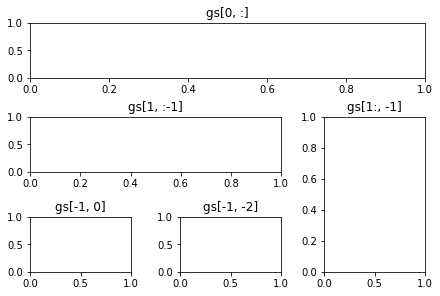

In [9]:
# 创建跨行列的子块才是Gridspec的优势:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

### subplotSpec:

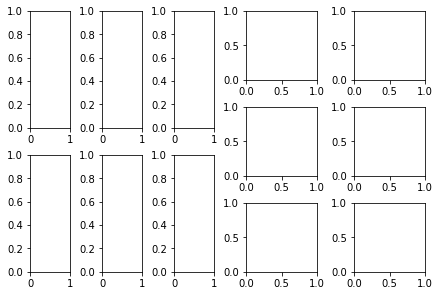

In [10]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)

for a in range(2):
    for b in range(3):
        fig10.add_subplot(gs00[a, b])
        fig10.add_subplot(gs01[b, a])

# Axes属性

## Axes属性用法
    1. plt.subplot(axes_property1=xxx,axes_property2=yyy);
    2. ax.set(axes_property1=xxx,axes_property2=yyy)
    3. ax.set_axes_property(arg1=xxx,arg2=yyy);

## Axes属性参数介绍

###  adjustable: axes长宽比例调整方式
    'box': 改变axes的物理尺寸;
    'datalim': 更改x或者y数据限制;

Text(5.25, 2, "ax2.set_adjustable(adjustable='datalim',share=False)")

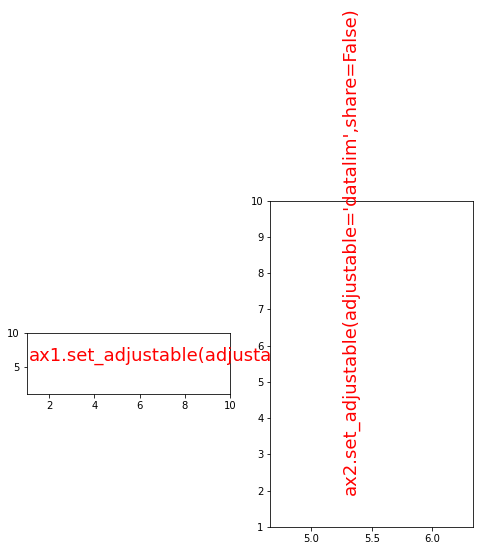

In [9]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
ax1.set_adjustable(adjustable="box",     #设置轴如何调整以达到所需的纵横比。'box':更改axes的物理尺寸; 'datalim': 更改x或者y数据限制;  
                  share=False,           #bool, default:False, True:将设置应用到所有共享轴
                 )
ax1.set_xlim((1,10),     #在坐标上的xlim的左端和右端;
            emit=False,
            auto=False
           )

ax1.set_ylim((1,10),     #在坐标上的xlim的左端和右端;
            emit=False,
            auto=False
           )

ax1.set_aspect(aspect=0.3,   #{'auto', 'equal'} or float: 'auto':用数据填充位置矩形; 'equal':x,y相同比例 
#                adjustable='box', #同ax3.set_adjustable参数
#                anchor='C',       #同ax3.set_anchor
               share=True,       #bool, default:False, True:将设置应用到所有共享轴               
              )
ax1.text(s="ax1.set_adjustable(adjustable='box',share=False",x=1.1,y=6,color='r',fontsize=18)


ax2 = fig.add_subplot(122)
ax2.set_adjustable(adjustable="datalim",     #设置轴如何调整以达到所需的纵横比。'box':更改axes的物理尺寸; 'datalim': 更改x或者y数据限制;  
                  share=False,           #bool, default:False, True:将设置应用到所有共享轴
                 )
ax2.set_xlim((1,10),     #在坐标上的xlim的左端和右端;
            emit=False,
            auto=False
           )

ax2.set_ylim((1,10),     #在坐标上的xlim的左端和右端;
            emit=False,
            auto=False
           )

ax2.set_aspect(aspect=0.3,   #{'auto', 'equal'} or float: 'auto':用数据填充位置矩形; 'equal':x,y相同比例 
#                adjustable='box', #同ax3.set_adjustable参数
#                anchor='C',       #同ax3.set_anchor
               share=True,       #bool, default:False, True:将设置应用到所有共享轴               
              )
ax2.text(s="ax2.set_adjustable(adjustable='datalim',share=False)",x=5.25,y=2,color='r',fontsize=18,rotation=90)

### alpha: 混合透明度

{'bodies': [<matplotlib.collections.PolyCollection object at 0x000001C87E153A30>], 'cmaxes': <matplotlib.collections.LineCollection object at 0x000001C87E33DF10>, 'cmins': <matplotlib.collections.LineCollection object at 0x000001C87F5FCF40>, 'cbars': <matplotlib.collections.LineCollection object at 0x000001C87F785670>}


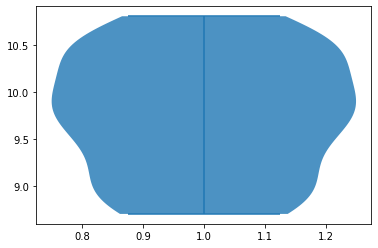

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

val = ax.violinplot(data['open'])
print(val)
for i in val["bodies"]:
    i.set_alpha(0.8)

### anchor:定义定位点位置。
    当需要固定面时，轴的实际绘图区域（活动位置）可能小于bbox（原始位置）。定位点定义绘图区域在可用空间内的位置。
    'NW' 'N' 'NE'
    'W' 'C' 'E'
    'SW' 'S' 'SE'

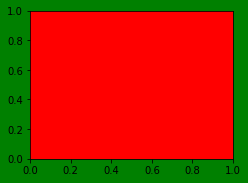

In [96]:
fig = plt.figure(figsize=(8,6),facecolor='green')
ax = fig.add_subplot(221,facecolor='red')
ax.set_anchor(anchor='SE')

### aminated(b):设置艺术家的动画状态。

### aspect:设置轴缩放的纵横比，即Y单位与X单位的比率。

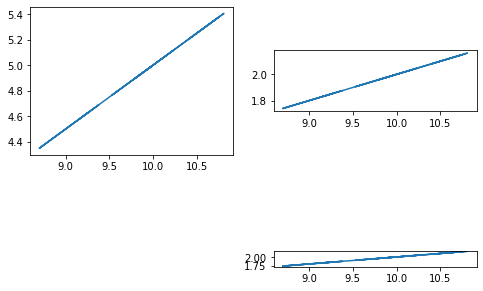

In [11]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)

ax1.plot(data.open,data.open/2)
ax1.set_aspect(aspect='auto',     #'auto': fill the position rectangle with data.
                                  #'equal': same as aspect=1, i.e. same scaling for x and y.
                                  #float: height = float * width.
               adjustable='box',  #同adjustable属性
               anchor='C',     #同anchor属性
               share=False,
              )

ax2.plot(data.open,data.open/5)
ax2.set_aspect(aspect=1.5,
              adjustable='box',
              anchor='C',
              share=False,
              )
ax4.plot(data.open,data.open/5)
ax4.set_aspect(aspect=0.4,
              adjustable='box',
              anchor='C',
              share=False,
              )

### autoscale_on(b=True):设置是否自动缩放坐标轴范围
    pyplot模块中的autoscale函数可以切换是否自动缩放坐标轴范围,xlim()和ylim()函数可手动设置坐标轴范围。
    
    底层相关函数有：
        Axes.autoscale
        Axes.autoscale_view
        Axes.set_autoscale_on
        Axes.get_autoscale_on
        Axes.set_autoscalex_on
        Axes.get_autoscalex_on
        Axes.set_autoscaley_on
        Axes.get_autoscaley_on

Text(0.2, 0.5005, 'ax2.set_autoscale_on(False)')

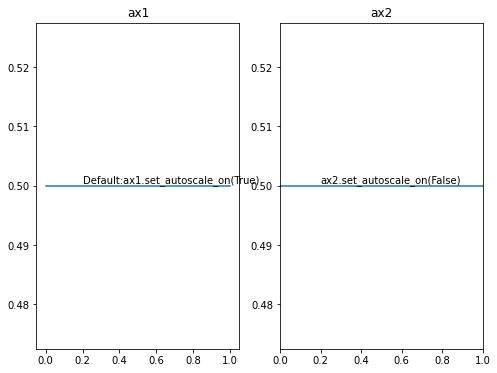

In [12]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,sharey=ax1)
ax1.plot([0.5,0.5])
ax1.set_title("ax1")
ax1.set_autoscale_on(True)
ax1.annotate("Default:ax1.set_autoscale_on(True)",xy=(0.2,0.5005))

ax2.plot([0.5,0.5])
ax2.set_autoscale_on(False)
ax2.set_title("ax2")
ax2.annotate("ax2.set_autoscale_on(False)",xy=(0.2,0.5005))

### xlim()/ylim():手动设置x坐标轴的范围或获取x坐标轴的范围

In [15]:
dt = data.open[:4]

Text(0.5, 1.0, 'Default ylim')

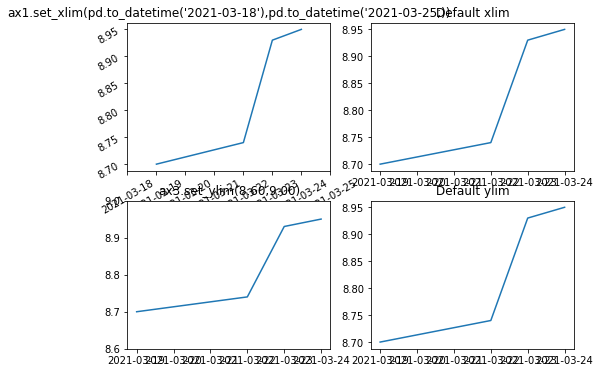

In [16]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.plot(dt)
ax1.set_xlim(pd.to_datetime("2021-03-18"),pd.to_datetime("2021-03-25"))
ax1.tick_params(labelrotation=30)
ax1.set_title("ax1.set_xlim(pd.to_datetime('2021-03-18'),pd.to_datetime('2021-03-25;))")

ax2 = fig.add_subplot(222)
ax2.plot(dt)
ax2.set_title("Default xlim")

ax3 = fig.add_subplot(223)
ax3.plot(dt)
ax3.set_ylim(8.60,9.00)
ax3.set_title("ax3.set_ylim(8.60,9.00)")

ax4 = fig.add_subplot(224)
ax4.plot(dt)
ax4.set_title("Default ylim")


### axisbelow(b):设置轴刻度线和网格线是在大多数axes的上方还是下方。
    b: bool or 'line'
        True (zorder = 0.5): Ticks and gridlines are below all Artists.
        'line' (zorder = 1.5): Ticks and gridlines are above patches (e.g. rectangles, with default zorder = 1) but still below lines and markers (with their default zorder = 2).
        False (zorder = 2.5): Ticks and gridlines are above patches and lines / markers.

Text(8.8, 10.25, "ax3.set_axisbelow('line') \n no big difference 'line' and 'False'")

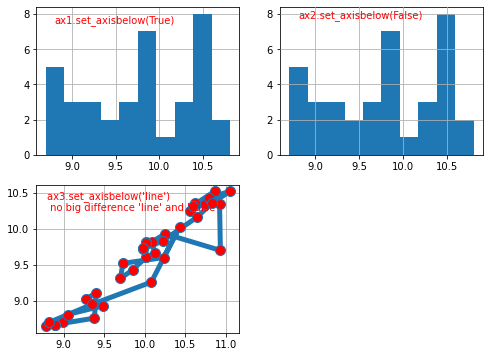

In [18]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.hist(data['open'])
ax1.grid()
ax1.set_axisbelow(True)
ax1.text(s="ax1.set_axisbelow(True)",x=8.8,y=7.5,color='r',fontsize=10)

ax2 = fig.add_subplot(222)
ax2.hist(data.open)
ax2.grid()
ax2.set_axisbelow(False)
ax2.text(s="ax2.set_axisbelow(False)",x=8.8,y=7.8,color='r',fontsize=10)

ax3 = fig.add_subplot(223)
ax3.plot(data.high.tolist(),data.low.tolist(),marker='o',markersize=10,markerfacecolor='red',linewidth=5)
ax3.grid()
ax3.set_axisbelow('line')
# ax3.set_axisbelow(False)
ax3.text(s="ax3.set_axisbelow('line') \n no big difference 'line' and 'False'",x=8.8,y=10.25,color='r',fontsize=10)

### box_aspect():Set the axes box aspect, i.e. the ratio of height to width.只改变物理尺寸
    aspect:float or None
        Changes the physical dimensions of the Axes, such that the ratio of the axes height to the axes width in physical units is equal to aspect. Defining a box aspect will change the adjustable property to 'datalim' (see set_adjustable).
        None will disable a fixed box aspect so that height and width of the axes are chosen independently.

Text(9, 14, 'ax1.set_box_aspect(2)')

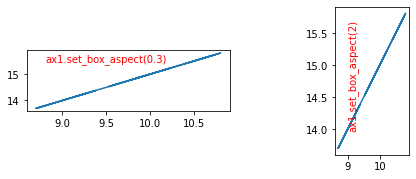

In [20]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.plot(data.open,data.open+5)
ax1.set_box_aspect(0.3)
ax1.text(s="ax1.set_box_aspect(0.3)",x=8.8,y=15.5,color='r',fontsize=10)

ax2 = fig.add_subplot(222)
ax2.plot(data.open,data.open+5)
ax2.set_box_aspect(2)
ax2.text(s="ax1.set_box_aspect(2)",x=9,y=14,color='r',fontsize=10,rotation=90)

### frame_on(b): 是否显示子图边框

Text(0.2, 0.5, 'ax1.set_frame_on(False)')

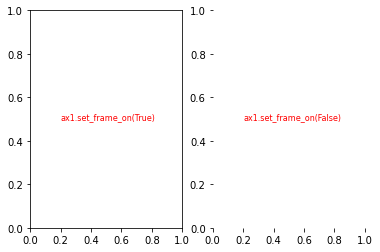

In [22]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(121)
ax1.set_frame_on(True)
ax1.text(s="ax1.set_frame_on(True)",x=0.2,y=0.5,color='r',fontsize=8)

ax2 = fig.add_subplot(122)
ax2.set_frame_on(False)
ax2.text(s="ax1.set_frame_on(False)",x=0.2,y=0.5,color='r',fontsize=8)

### gid(str): 设置axes的id

'tst_id_02'

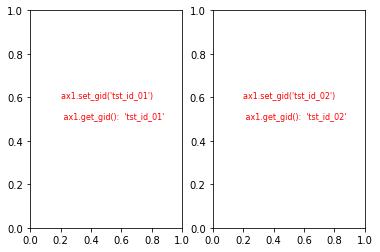

In [24]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(121)
ax1.set_gid("tst_id_01")
ax1.text(s="ax1.set_gid('tst_id_01') \n\n ax1.get_gid():  'tst_id_01'",x=0.2,y=0.5,color='r',fontsize=8)

ax2 = fig.add_subplot(122)
ax2.set_gid("tst_id_02")
ax2.text(s="ax1.set_gid('tst_id_02') \n\n ax1.get_gid():  'tst_id_02'",x=0.2,y=0.5,color='r',fontsize=8)

ax2.get_gid()

### in_layout(): ?? Set if artist is to be included in layout calculations
    E.g. Constrained Layout Guide, Figure.tight_layout(), and fig.savefig(fname, bbox_inches='tight').

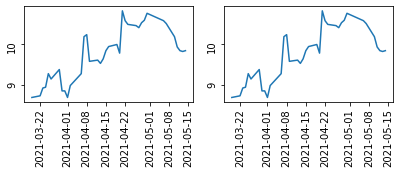

In [27]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(221)
ax1.set_in_layout(in_layout=True)
ax1.plot(data.open)
plt.tick_params(labelrotation=90)

ax2 = fig.add_subplot(222)
ax2.plot(data.open)
ax2.set_in_layout(in_layout=False)

fig.tight_layout()
plt.tick_params(labelrotation=90)

# plt.savefig('in_layout_True',bbox_inches='tight')

### label(str):设置将在图例中显示的标签。

ax.get_label():'set_label'


Text(0.2, 0.5, "ax.set_label(s='set_label') \n ax.get_label():'set_label'")

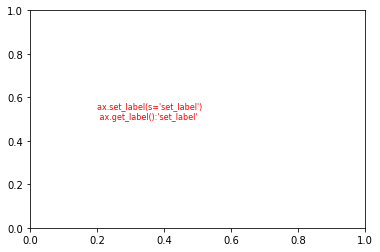

In [28]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_label(s="set_label")
label = ax.get_label()
print(f"ax.get_label():'{label}'")

ax.text(s="ax.set_label(s='set_label') \n ax.get_label():'set_label'",x=0.2,y=0.5,fontsize=8,color='r')

### navigate(b):设置轴是否响应导航工具栏命令

None


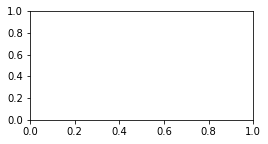

In [29]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot()
ax.set_navigate(b=False)

navigate = ax.get_navigate_mode()
print(navigate)
# 获取导航工具栏按钮状态：“平移”、“缩放”或“无”

### path_effect():设置路径效果
    简单来说就是设置艺术字,给线条等做修饰
    参数:
        path_effects ： AbstractPathEffect:AbstractPathEffect  这里有很多方法,可以参考官方文档

In [31]:
import matplotlib.patheffects as path_effects

Text(0.28, 0.2, 'Line2D:path_effects')

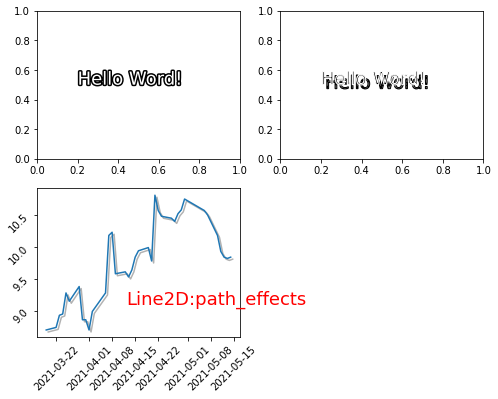

In [32]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
text1 = ax1.text(s="Hello Word!",x=0.2,y=0.5,color='white',fontsize=18)
text1.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()
                       ])

ax2 = fig.add_subplot(222)
text2 = ax2.text(s="Hello Word!",x=0.2,y=0.5,color='r',fontsize=18)
text2.set_path_effects([path_effects.PathPatchEffect(offset=(4, -4), hatch='xxxx',facecolor='gray'),
                       path_effects.PathPatchEffect(edgecolor='white', linewidth=1.1,facecolor='black')
                       ])

ax3 = fig.add_subplot(223)
ax3.plot('open',data=data,
        path_effects=[path_effects.SimpleLineShadow(),path_effects.Normal()
        ])
ax3.tick_params(labelrotation=45)

fig.text(s="Line2D:path_effects",x=0.28,y=0.2,c='r',fontsize=18)


### picker(): 定义对Artist的拾取行为
    None or bool or float or callable
    None ：此艺术家禁用拾取（默认）。
    布尔值：如果 True 然后将启用拾取，并且如果鼠标事件位于艺术家上方，艺术家将触发拾取事件。
    一个函数：如果picker是可调用的，它是一个用户提供的函数，用于确定艺术家是否被鼠标事件击中：
        hit, props = picker(artist, mouseevent)
        以确定命中测试。如果鼠标事件在艺术家上方，则返回 hit=True props是一个你想要添加到pickevent属性的属性字典。

### position():设置axes的位置 ?
    pos:[left, bottom, width, height] or Bbox; The new position of the in Figure coordinates.
    which: {'both', 'active', 'original'}, default: 'both';Determines which position variables to change.

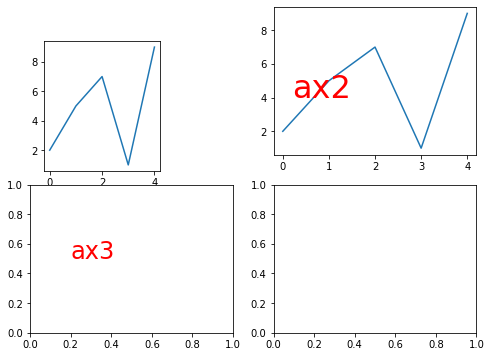

In [140]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.plot([2,5,7,1,9])
ax1.set_position(pos=[0.15,0.5,0.2,0.3],
               which='both',)

ax2 = fig.add_subplot(222)
ax2.plot([2,5,7,1,9])
# ax2.set_position(pos=[1,1,0.5,1],
#                which='both',)
ax2.text(s="ax2",x=0.2,y=4,fontsize=32,color='r')


ax3 = fig.add_subplot(223)
ax3.text(s="ax3",x=0.2,y=0.5,fontsize=24,color='r')

ax4 = fig.add_subplot(224)

### prop_cycle():设置axes属性循环
    cycler: Cycler,Set the given Cycler. None resets to the cycle defined by the current style.

    label: str,The property key. Must be a valid Artist property. For example, 'color' or 'linestyle'. Aliases are allowed, such as 'c' for 'color' and 'lw' for 'linewidth'.

    values: iterable,Finite-length iterable of the property values. These values are validated and will raise a ValueError if invalid.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data

fname = get_sample_data('percent_bachelors_degrees_women_usa.csv',
                        asfileobj=False)
gender_degree_data = np.genfromtxt(fname, delimiter=',', names=True)

In [145]:
# gender_degree_data

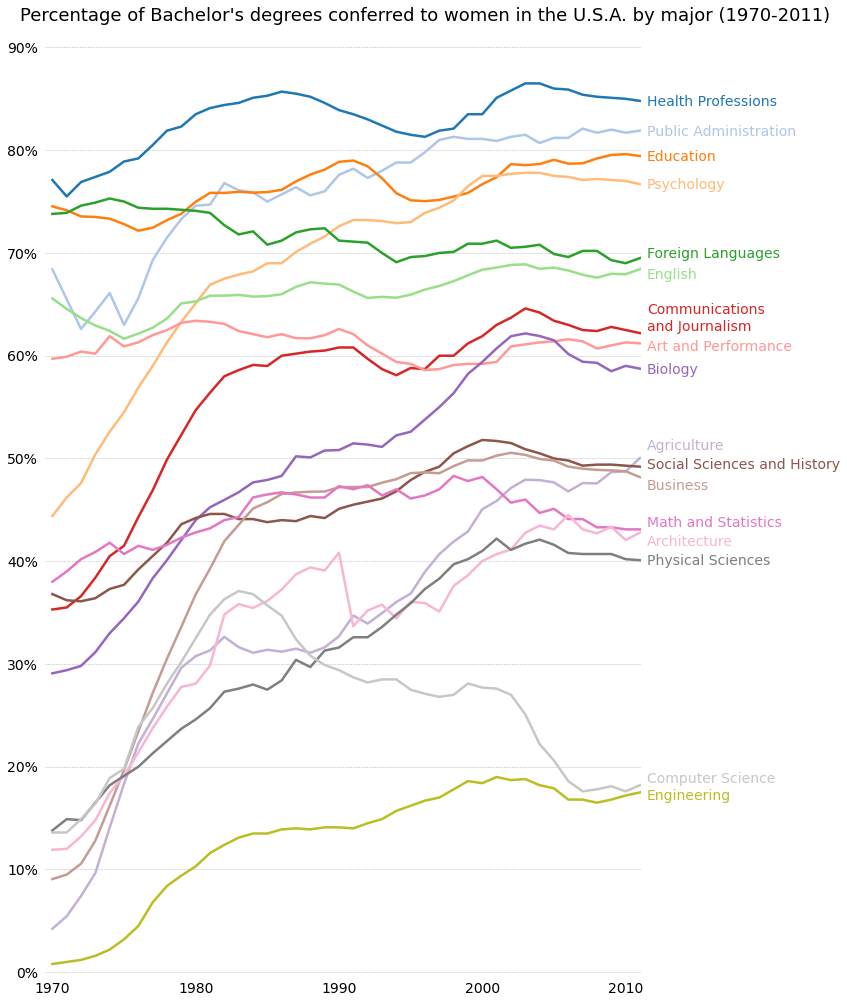

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data

fname = get_sample_data('percent_bachelors_degrees_women_usa.csv',
                        asfileobj=False)
gender_degree_data = np.genfromtxt(fname, delimiter=',', names=True)

# You typically want your plot to be ~1.33x wider than tall. This plot
# is a rare exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])

# Remove the plot frame lines. They are unnecessary here.
ax.spines[:].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(1969.5, 2011.1)
ax.set_ylim(-0.25, 90)

# Set a fixed location and format for ticks.
ax.set_xticks(range(1970, 2011, 10))
ax.set_yticks(range(0, 91, 10))
# Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_major_formatter('{x:.0f}%')

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
majors = ['Health Professions', 'Public Administration', 'Education',
          'Psychology', 'Foreign Languages', 'English',
          'Communications\nand Journalism', 'Art and Performance', 'Biology',
          'Agriculture', 'Social Sciences and History', 'Business',
          'Math and Statistics', 'Architecture', 'Physical Sciences',
          'Computer Science', 'Engineering']

y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications\nand Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}

for column in majors:
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_')

    line, = ax.plot('Year', column_rec_name, data=gender_degree_data,
                    lw=2.5)

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = gender_degree_data[column_rec_name][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    ax.text(2011.5, y_pos, column, fontsize=14, color=line.get_color())

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle("Percentage of Bachelor's degrees conferred to women in "
             "the U.S.A. by major (1970-2011)", fontsize=18, ha="center")

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
# fig.savefig('percent-bachelors-degrees-women-usa.png', bbox_inches='tight')
plt.show()


<Axes: xlabel='trade_date'>

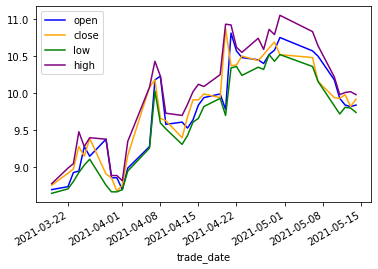

In [33]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
# ax.set_prop_cycle(color=['blue','orange','green','purple'])
data[["open",'close','low','high']].plot(ax=ax,color=['blue','orange','green','purple'])

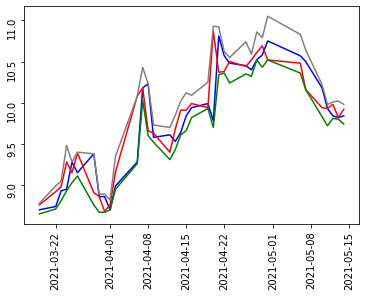

In [35]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
# ax.set_prop_cycle(color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])
ax.set_prop_cycle(color=['b','r','green','grey'])
for col in data[["open",'close','low','high']].columns:
    ax.plot(col,data=data)
plt.tick_params(labelrotation=90)
plt.show()

Text(0.5, 1.0, 'Rasterization z$<-10$')

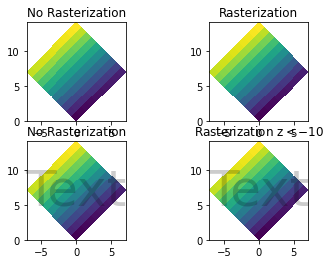

In [25]:
import numpy as np
import matplotlib.pyplot as plt

d = np.arange(100).reshape(10, 10)
x, y = np.meshgrid(np.arange(11), np.arange(11))

theta = 0.25*np.pi
xx = x*np.cos(theta) - y*np.sin(theta)
yy = x*np.sin(theta) + y*np.cos(theta)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_aspect(1)
ax1.pcolormesh(xx, yy, d)
ax1.set_title("No Rasterization")

ax2.set_aspect(1)
ax2.set_title("Rasterization")

m = ax2.pcolormesh(xx, yy, d)
m.set_rasterized(True)

ax3.set_aspect(1)
ax3.pcolormesh(xx, yy, d)
ax3.text(0.5, 0.5, "Text", alpha=0.2,
         va="center", ha="center", size=50, transform=ax3.transAxes)

ax3.set_title("No Rasterization")


ax4.set_aspect(1)
m = ax4.pcolormesh(xx, yy, d)
m.set_zorder(-20)

ax4.text(0.5, 0.5, "Text", alpha=0.2,
         zorder=-15,
         va="center", ha="center", size=50, transform=ax4.transAxes)

ax4.set_rasterization_zorder(-10)

ax4.set_title("Rasterization z$<-10$")


# ax2.title.set_rasterized(True) # should display a warning

# plt.savefig("test_rasterization.pdf", dpi=150)
# plt.savefig("test_rasterization.eps", dpi=150)

# if not plt.rcParams["text.usetex"]:
#     plt.savefig("test_rasterization.svg", dpi=150)
    # svg backend currently ignores the dpi

### sketch_params():草图参数
    scalefloat, optional,The amplitude of the wiggle perpendicular to the source line, in pixels. If scale is None, or not provided, no sketch filter will be provided.

    length: float, optional,The length of the wiggle along the line, in pixels (default 128.0)

    randomness: float, optional,The scale factor by which the length is shrunken or expanded (default 16.0)

### snap():设置捕捉行为。
    捕捉将位置与像素网格对齐，这样可以获得更清晰的图像。例如，如果在两个像素之间的位置定义了1px宽度的黑线，则生成的图像将包含像素网格中该线的插值值，该值将是两个相邻像素位置上的灰度值。相反，捕捉会将线条移动到最接近的整数像素值，因此生成的图像将真正包含1px宽的黑线。
    snap: bool or None
        Possible values:
        True:    Snap vertices to the nearest pixel center.
        False:   Do not modify vertex positions.
        None:   (auto) If the path contains only rectilinear line segments, round to the nearest pixel center

### title():设置标题

Text(0.5, 0.98, 'fig.suptitle')

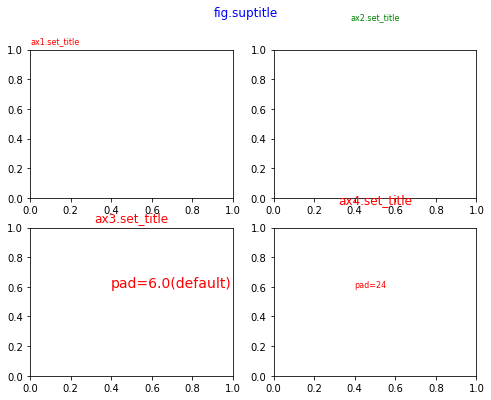

In [39]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.set_title("ax1.set_title",
             loc='left',  #{'center', 'left', 'right'},调节所有位置
             y=1,         #float, default: rcParams["axes.titley"] (default: None) y轴方向的位置
             pad=6.0,     #文本从axes上边沿的偏移量
              #Text文本属性:
             c='r',
             fontsize=8
            )
ax2 = fig.add_subplot(222)
ax2.set_title("ax2.set_title",
             loc="center",
             y=1.2,
             pad=0.6,
             c='g',
             fontsize=8)

ax3 = fig.add_subplot(223)
ax3.set_title("ax3.set_title",pad=6.0,c='r')
ax3.text(s="pad=6.0(default)",x=0.4,y=0.6,color='r',fontsize=14)

ax4 = fig.add_subplot(224)
ax4.set_title("ax4.set_title",pad=24,c='r')
ax4.text(s="pad=24",x=0.4,y=0.6,color='r',fontsize=8)

fig.suptitle('fig.suptitle',color='blue',fontsize=12)  #这个是pyplot函数,或plt.suptitle()

### transform(): 设置坐标系变换?
    ax.set_transform()
    t ： Transform变换
    https://blog.csdn.net/sinat_32570141/article/details/113048947

### url: 添加url
    url,set哪里去了呢?
    通常是图片保存成svg格式url才生效

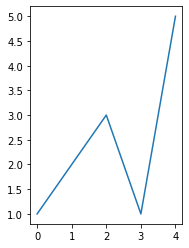

In [40]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(121)
ax1.plot([1,2,3,1,5])
ax1.set_url(url="https://www.baidu.com",)
plt.savefig("tst.svg")

### visible(b): 是否可见

### xbound()/ybound(): 设置X轴的上下数值边界。
    无论参数顺序如何，此方法都将支持轴反转。它不会更改自动缩放设置 (get_autoscalex_on() ）
    see also: xlim,ylim

Text(5, 1, 'ax2.set_xbound(3,10) \n ax2.set_ybound(0,11)')

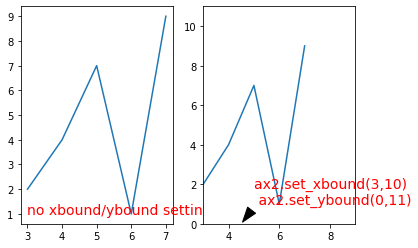

In [41]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(121)
ax1.plot([3,4,5,6,7],[2,4,7,1,9])
ax1.text(s="no xbound/ybound setting",x=3,y=1,color="r",fontsize=14)
# ax1.set_ylim(2,15)
# ax1.set_ybound(2,15)

ax2 = fig.add_subplot(122)
ax2.plot([3,4,5,6,7],[2,4,7,1,9])
ax2.set_xbound(3,9)
ax2.set_ybound(0,11)
# ax2.text(s="ax2.set_xbound(3,10)",x=5,y=0.6,color="r",fontsize=14)
ax2.annotate(text="ax2.set_xbound(3,10) \n ax2.set_ybound(0,11)",xy=(4.5,0),xytext=(5,1),color='r',fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='black', shrink=0.1))

### xlabel()/ylabel(): x轴/y轴标签

Text(0.6, 0.2, "labelpad=48,\nloc='center'")

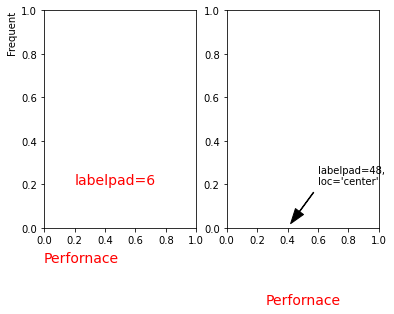

In [42]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel(xlabel="Perfornace",
               labelpad=6,      #float, default: rcParams["axes.labelpad"] (default: 4.0), 到axes下边框距离
               loc="left",       #{'left', 'center', 'right'}, default: rcParams["xaxis.labellocation"] (default: 'center')
               #Text属性
               color="r",
               fontsize=14
               )
ax1.set_ylabel(ylabel="Frequent",
               loc="top",     #{{'bottom', 'center', 'top'}}, default: rcParams["yaxis.labellocation"] (default: 'center')
              )
ax1.text(s="labelpad=6",x=0.2,y=0.2,c='r',fontsize=14)

ax2 = fig.add_subplot(122)
ax2.set_xlabel(xlabel="Perfornace",
               labelpad=48,      #float, default: rcParams["axes.labelpad"] (default: 4.0), 到axes下边框距离
               loc="center",       #{'left', 'center', 'right'}, default: rcParams["xaxis.labellocation"] (default: 'center')
               #Text属性:
               color="r",
               fontsize=14
               )
ax2.annotate(text="labelpad=48,\nloc='center'",xy=(0.4,0),xytext=(0.6,0.2),arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='black', shrink=0.1))

### xlim()/ylim:x轴的上下限

Text(4, 5, 'xlim:(2,8) \nylim:(3,8)\nequal previous two')

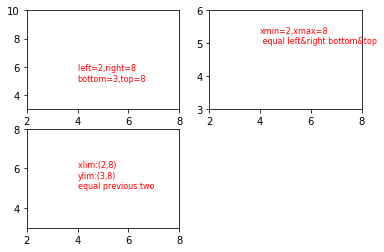

In [44]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(221)
ax1.set_xlim(left=2,    #float, optional,左边界
            right=8,    #float, optional,右边界
            emit=True, #bool, default: True,Whether to notify observers of limit change.
            auto=True, #bool or None, default: False,Whether to turn on autoscaling of the x-axis.
#             xmin=2,    #同left, 不能和left同时使用
#             xmax=8,    #同right,不能和right同时使用
            )
ax1.set_ylim(bottom=3,top=10)
ax1.text(s="left=2,right=8 \nbottom=3,top=8",x=4,y=5,color='r',fontsize=8)

ax2 = fig.add_subplot(222)
ax2.set_xlim(
#             left=2,    #float, optional,左边界
#             right=8,    #float, optional,右边界
            emit=True, #bool, default: True,Whether to notify observers of limit change.
            auto=True, #bool or None, default: False,Whether to turn on autoscaling of the x-axis.
            xmin=2,    #同left, 不能和left同时使用
            xmax=8,    #同right,不能和right同时使用
            )
ax2.set_ylim(ymin=3,ymax=6)
ax2.text(s="xmin=2,xmax=8\n equal left&right bottom&top",x=4,y=5,color='r',fontsize=8)

ax3 = fig.add_subplot(223)
ax3.set_xlim((2,8),    #float, optional,左边界
            emit=True, #bool, default: True,Whether to notify observers of limit change.
            auto=True, #bool or None, default: False,Whether to turn on autoscaling of the x-axis.
#             xmin=2,    #同left, 不能和left同时使用
#             xmax=8,    #同right,不能和right同时使用
            )
ax3.set_ylim((3,8))
ax3.text(s="xlim:(2,8) \nylim:(3,8)\nequal previous two",x=4,y=5,color='r',fontsize=8)

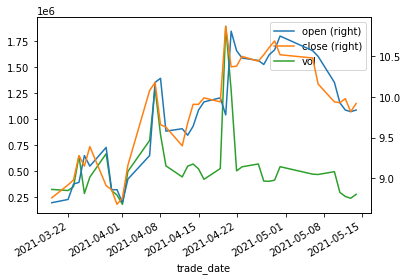

In [51]:
#DataFrame 中的sencondary_y 刻度设置
ax = data[['open','close','vol']].plot(secondary_y=['open','close'])
# ax.set_ylim([0.2,1.8])
# ax.right_ax.set_ylim([8,12])

In [53]:
# plt.get(ax)

### xmargin(m)/ymargin(m):Set padding of X/Y data limits prior to autoscaling.
    m:float greater than -0.5
    例如，如果数据在范围内 [0, 2] 一个因素 m = 0.1 将产生一个范围 [-0.2, 2.2] 
    负值-0.5<m<0将导致数据范围的剪切。即数据范围 [0, 2] 一个因素 m = -0.1 将产生一个范围 [0.2，1.8] .

Text(2, 3, 'ax6.set_xmargin(m=0.5)')

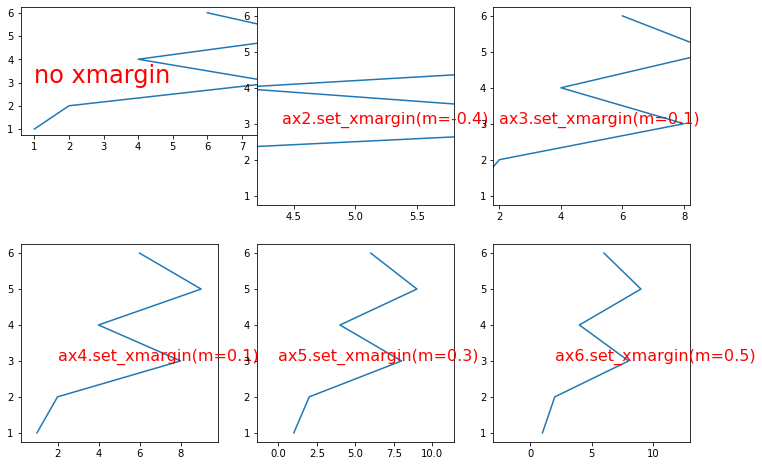

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(321)
ax1.plot([1,2,8,4,9,6],[1,2,3,4,5,6])
# ax1.set_xmargin(m=0)
ax1.text(s="no xmargin",x=1,y=3,c='r',fontsize=24)

ax2 = fig.add_subplot(232)
ax2.plot([1,2,8,4,9,6],[1,2,3,4,5,6])
ax2.set_xmargin(m=-0.4)
# ax2.set_ymargin(m=-0.4)
ax2.text(s="ax2.set_xmargin(m=-0.4)",x=4.4,y=3,c='r',fontsize=16)

ax3 = fig.add_subplot(233)
ax3.plot([1,2,8,4,9,6],[1,2,3,4,5,6])
ax3.set_xmargin(m=-0.1)
ax3.text(s="ax3.set_xmargin(m=0.1)",x=2,y=3,c='r',fontsize=16)

ax4 = fig.add_subplot(234)
ax4.plot([1,2,8,4,9,6],[1,2,3,4,5,6])
ax4.set_xmargin(m=0.1)
ax4.text(s="ax4.set_xmargin(m=0.1)",x=2,y=3,c='r',fontsize=16)

ax5 = fig.add_subplot(235)
ax5.plot([1,2,8,4,9,6],[1,2,3,4,5,6])
ax5.set_xmargin(m=0.3)
ax5.text(s="ax5.set_xmargin(m=0.3)",x=0,y=3,c='r',fontsize=16)

ax6 = fig.add_subplot(236)
ax6.plot([1,2,8,4,9,6],[1,2,3,4,5,6])
ax6.set_xmargin(m=0.5)
ax6.text(s="ax6.set_xmargin(m=0.5)",x=2,y=3,c='r',fontsize=16)

In [ ]:
data.columns

### xscale()/yscale():设置坐标轴的缩放类型
    同yscale
    xscale函数的返回值为(locs, labels)元组。其中locs为X轴刻度位置列表，labels为X轴刻度标签列表

<ipython-input-54-a0359ec65955>:25: UserWarning: Data has no values between 0 and 1, and therefore cannot be logit-scaled.
  ax4.set_xscale(value="logit",     #value: “Linear”，“Log”，“SymLog”，“Logit”，…
<ipython-input-54-a0359ec65955>:27: UserWarning: Data has no values between 0 and 1, and therefore cannot be logit-scaled.
  ax4.set_yscale(value="logit")


Text(0.7, 0.3, "xscale/yscale='logit'")

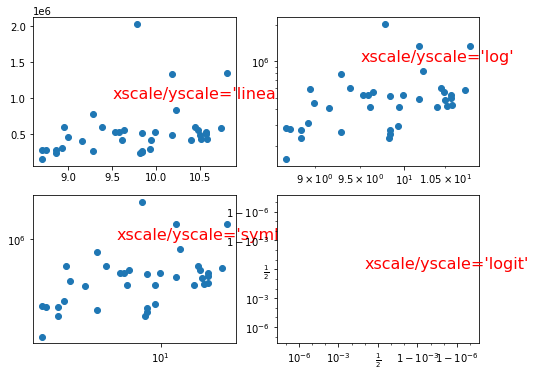

In [54]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.scatter(data["open"],data["amount"])
ax1.set_xscale(value="linear",     #value: “Linear”(default)，“Log”，“SymLog”，“Logit”，…
              )
ax2.set_yscale(value="linear")
ax1.text(s="xscale/yscale='linear'(default)",x=9.5,y=1000000,c='r',fontsize=16)

ax2 = fig.add_subplot(222)
ax2.scatter(data["open"],data["amount"])
ax2.set_xscale(value="log",     #value: “Linear”，“Log”，“SymLog”，“Logit”，…
              )
ax2.set_yscale(value="log")
ax2.text(s="xscale/yscale='log'",x=9.5,y=1000000,c='r',fontsize=16)

ax3 = fig.add_subplot(223)
ax3.scatter(data["open"],data["amount"])
ax3.set_xscale(value="symlog",     #value: “Linear”，“Log”，“SymLog”，“Logit”，…
              )
ax3.set_yscale(value="symlog")
ax3.text(s="xscale/yscale='symlog'",x=9.5,y=1000000,c='r',fontsize=16)

ax4 = fig.add_subplot(224)
ax4.scatter(data["open"],data["amount"])
ax4.set_xscale(value="logit",     #value: “Linear”，“Log”，“SymLog”，“Logit”，…
              )
ax4.set_yscale(value="logit")
fig.text(s="xscale/yscale='logit'",x=0.7,y=0.3,c='r',fontsize=16)

### xticklabels()/ytickslabels():用字符串标签列表设置xaxis标签
    注: 和 plt.xticks(ticks,labels,**kwarg)的区别

<ipython-input-55-6fd4e5dae9eb>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=["one","two","three","four","five"],
<ipython-input-55-6fd4e5dae9eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=["one","two","three","four","five"],)


[None, None, None, None, None]

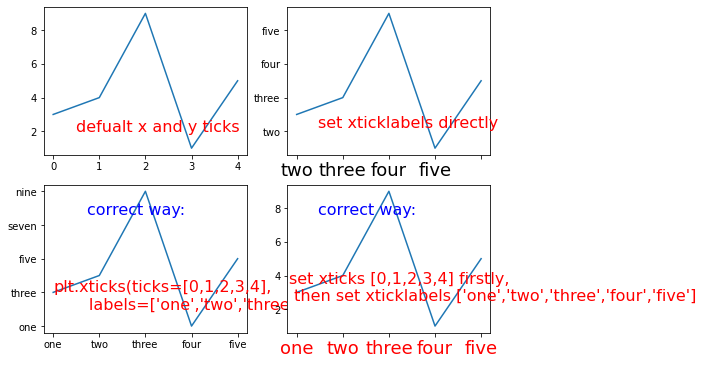

In [55]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.plot([3,4,9,1,5])
ax1.text(s="defualt x and y ticks",x=0.5,y=2,c='r',fontsize=16)

ax2 = fig.add_subplot(222)
ax2.plot([3,4,9,1,5])
ax2.set_xticklabels(labels=["one","two","three","four","five"],
                   fontdict={'fontsize':18},
                   minor=False,    #bool，默认值：False:是否设置次要刻度线标签而不是主要刻度线标签。
                   )
ax2.set_yticklabels(labels=["one","two","three","four","five"],)

fig.text(s="set xticklabels directly",x=0.6,y=0.6,c='r',fontsize=16)


ax3 = fig.add_subplot(223)
ax3.plot([3,4,9,1,5])
plt.xticks(ticks=[0,1,2,3,4],labels=["one","two","three","four","five"])
plt.yticks(ticks=[1,3,5,7,9],labels=["one","three","five","seven","nine"])
ax3.text(s="plt.xticks(ticks=[0,1,2,3,4],\n       labels=['one','two','three','four','five'])",x=0,y=2,c='r',fontsize=16)
fig.text(s="correct way:",x=0.2,y=0.4,fontsize=16,color='blue')

ax4 = fig.add_subplot(224)
ax4.plot([3,4,9,1,5])
ax4.set_xticks([0,1,2,3,4])
labels = ax4.set_xticklabels(labels=["one","two","three","four","five"],
                   fontdict={'fontsize':18},
                   minor=False,    #bool，默认值：False:是否设置次要刻度线标签而不是主要刻度线标签。
                   )
fig.text(s="set xticks [0,1,2,3,4] firstly,\n then set xticklabels ['one','two','three','four','five']",x=0.55,y=0.2,c='r',fontsize=16)
fig.text(s="correct way:",x=0.6,y=0.4,fontsize=16,color='blue')

[x.set_color('r') for x in labels]

# note: 用ticks选定自定义的标签位置,然后用ticklabels替代

### xticks()/yticks:设置X轴的刻度位置
    注: 和 plt.xticks(ticks,labels,**kwarg)的区别

Text(1, 17.5, 'minor=False \nmeans: subodinate scale will show')

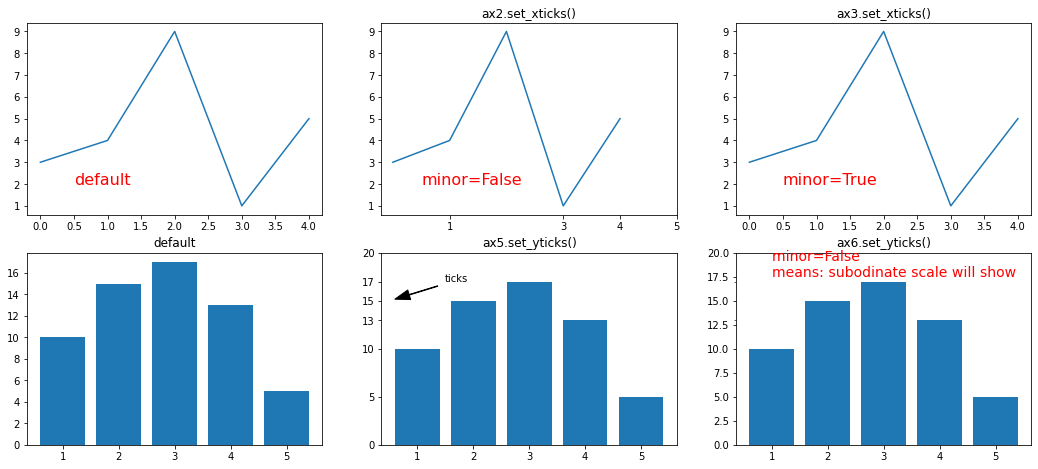

In [4]:
fig = plt.figure(figsize=(18,12))

ax1 = fig.add_subplot(331)
ax1.plot([3,4,9,1,5])
ax1.text(s="default",x=0.5,y=2,fontsize=16,c="r")

ax2 = fig.add_subplot(332)
ax2.plot([3,4,9,1,5])
ax2.set_xticks(ticks=[1,3,4,5],
               minor=False,       #bool,是否设置次刻度,True:是
              )
ax2.text(s="minor=False",x=0.5,y=2,fontsize=16,c="r")
ax2.set_title("ax2.set_xticks()")

ax3 = fig.add_subplot(333)
ax3.plot([3,4,9,1,5])
ax3.set_xticks(ticks=[0,1,2,3,4],
               minor=True,       #bool,是否设置次刻度,True:是
              )
ax3.text(s="minor=True",x=0.5,y=2,fontsize=16,c="r")
ax3.set_title("ax3.set_xticks()")


ax4 = fig.add_subplot(334)
ax4.bar(x=[1,2,3,4,5],height=[10,15,17,13,5])
ax4.set_title("default")

ax5 = fig.add_subplot(335)
ax5.bar(x=[1,2,3,4,5],height=[10,15,17,13,5])
ax5.set_yticks(ticks=[0,5,10,13,15,17,20])
ax5.set_title("ax5.set_yticks()")
ax5.annotate("ticks",xy=(0.5,15),xytext=(1.5,17),arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='black', shrink=0.1))

ax6 = fig.add_subplot(336)
ax6.bar(x=[1,2,3,4,5],height=[10,15,17,13,5])
ax6.set_yticks(ticks=[0,5,10,13,15,17,20],minor=True)
ax6.set_title("ax6.set_yticks()")
ax6.text(s="minor=False \nmeans: subodinate scale will show",x=1,y=17.5,color='r',fontsize=14)

### zorder():会将指定的先绘制的图放在底层显示

Text(2, 3, 'set scatter zorder level as 2.5')

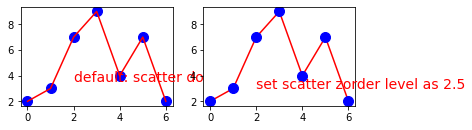

In [56]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(221)
ax1.plot([0,1,2,3,4,5,6],[2,3,7,9,4,7,2],c='r')
ax1.scatter(x=[0,1,2,3,4,5,6],y=[2,3,7,9,4,7,2],s=100,c='blue')
ax1.text(s="default: scatter dot under plot line",x=2,y=3.5,c='r',fontsize=14)

ax2 = fig.add_subplot(222)
ax2.plot([0,1,2,3,4,5,6],[2,3,7,9,4,7,2],c='r')
sc = ax2.scatter(x=[0,1,2,3,4,5,6],y=[2,3,7,9,4,7,2],s=100,c='blue',zorder=2.5)
# sc.set_zorder(level=2.5)
ax2.text(s="set scatter zorder level as 2.5",x=2,y=3,fontsize=14,c='r')


# Line2D属性
    用法:
        1.plt.plot(**kwargs )：Line2D 属性，可选line2d属性,比如设置线宽:
            plt.plot(linewidth=5)
        2. plt.plot()的返回值是Line2D的列表,所以还可以如下用:
            line = plt.plot()
            line.set_linewidth(5)

In [ ]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
ax1.plot(data.open.tolist(),linewidth=5)
ax1.tick_params(labelrotation=45)
ax1.text(s="ax1.plot(data.open.tolist(),linewidth=5)",x=11,y=9,color="r",fontsize=14)

ax2 = fig.add_subplot(222)
line, = ax2.plot(data.open.tolist())
ax2.tick_params(labelrotation=45)
line.set_linewidth(5)
line.set_color('blue')
ax2.text(s="line.set_linewidth(5)\nline.set_color('blue')",x=12,y=9,color="r",fontsize=14)



## agg_filter(): 过滤函数?

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()

## alpha(): 设置透明度,支持所有后端

In [ ]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
line1, = ax1.plot(data.open.tolist())
line2, = ax1.plot(data.high.tolist())

line1.set_alpha(0.8)
line2.set_alpha(0.3)

## animated(b): 动画状态?

## antialiased(b) or aa(): 是否使用抗锯齿渲染

## clip_box(clipbox): Set the artist's clip Bbox

## clip_path(): Set the artist's clip path

## color/c():颜色

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
line1, = ax1.plot(data.open.tolist())
line2, = ax1.plot(data.high.tolist())
line1.set_c("r")
line2.set_c("grey")

## contains():The provided callable replaces the default contains method of the artist.?

## dash_capstyle():设置虚线的封口样式?

## fig, ax = plt.subplots(figsize=(8, 2))
ax.set_title('Cap style')

for x, style in enumerate(['butt', 'round', 'projecting']):
    ax.text(x+0.25, 1, style, ha='center')
    xx = [x, x+0.5]
    yy = [0, 0]
    ax.plot(xx, yy, lw=12, color='tab:blue', solid_capstyle=style)
    ax.plot(xx, yy, lw=1, color='black')
    ax.plot(xx, yy, 'o', color='tab:red', markersize=3)
ax.text(2.25, 0.7, '(default)', ha='center')

ax.set_ylim(-.5, 1.5)
ax.set_axis_off()

## dash_joinstyle():设置虚线的连接样式?

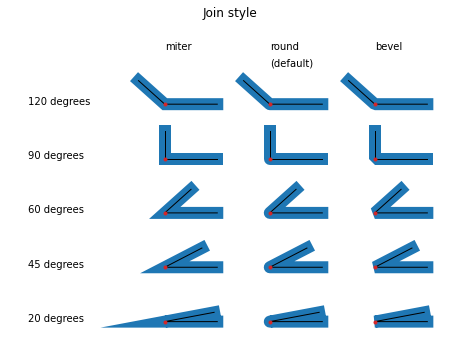

In [35]:
def plot_angle(ax, x, y, angle, style):
    phi = np.radians(angle)
    xx = [x + .5, x, x + .5*np.cos(phi)]
    yy = [y, y, y + .5*np.sin(phi)]
    ax.plot(xx, yy, lw=12, color='tab:blue', solid_joinstyle=style)
    ax.plot(xx, yy, lw=1, color='black')
    ax.plot(xx[1], yy[1], 'o', color='tab:red', markersize=3)


fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Join style')

for x, style in enumerate(['miter', 'round', 'bevel']):
    ax.text(x, 5, style)
    for y, angle in enumerate([20, 45, 60, 90, 120]):
        plot_angle(ax, x, y, angle, style)
        if x == 0:
            ax.text(-1.3, y, f'{angle} degrees')
ax.text(1, 4.7, '(default)')

ax.set_xlim(-1.5, 2.75)
ax.set_ylim(-.5, 5.5)
ax.set_axis_off()

## dashes():用于描述虚线和点中空格的长度。
    例如，（5，2，1，2）描述了由2个点空间分隔的5点和1点虚线组成的序列。

Text(0.5, 0.5, 'line3.set_dashes(seq=(5,3,1,3))')

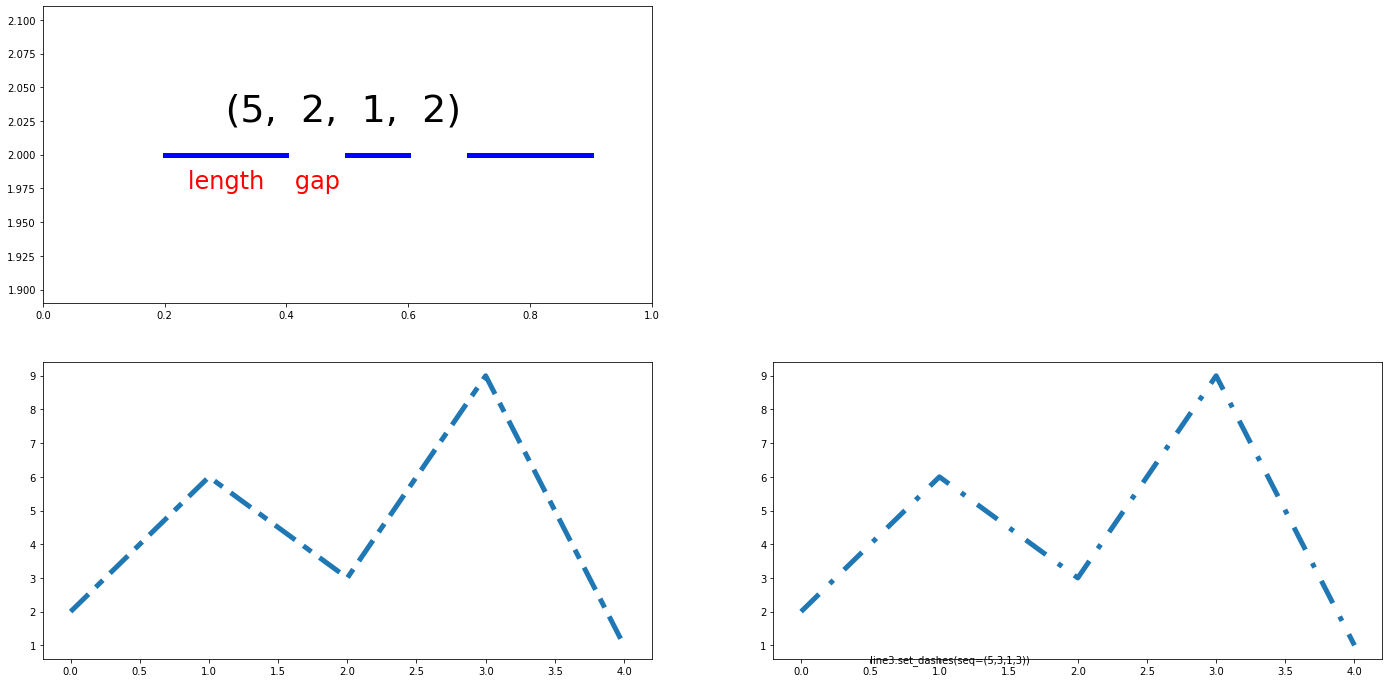

In [38]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(221)
ax1.set_xlim((0,1))
ax1.plot([0.2,0.4],[2,2],linestyle="-",color="blue",linewidth=5)
ax1.plot([0.5,0.6],[2,2],linestyle="-",color="blue",linewidth=5)
ax1.plot([0.7,0.9],[2,2],linestyle="-",color="blue",linewidth=5)
ax1.text(s="     (5,  2,  1,  2)",x=0.2,y=2.025,fontsize=38)
ax1.text(s="   length    gap",x=0.2,y=1.975,fontsize=24,color='r')
# ax1.set_axis_off()

ax2 = fig.add_subplot(223)
line2, = ax2.plot([2,6,3,9,1],linestyle="--")
line2.set_linewidth(5)
line2.set_dashes(seq=(5,2,2,2))

ax3 = fig.add_subplot(224)
line3, = ax3.plot([2,6,3,9,1],linestyle="--")
line3.set_linewidth(5)
line3.set_dashes(seq=(5,3,1,3))
ax3.text(s="line3.set_dashes(seq=(5,3,1,3))",x=0.5,y=0.5)

## data():设置x和y数据。重新设置数据

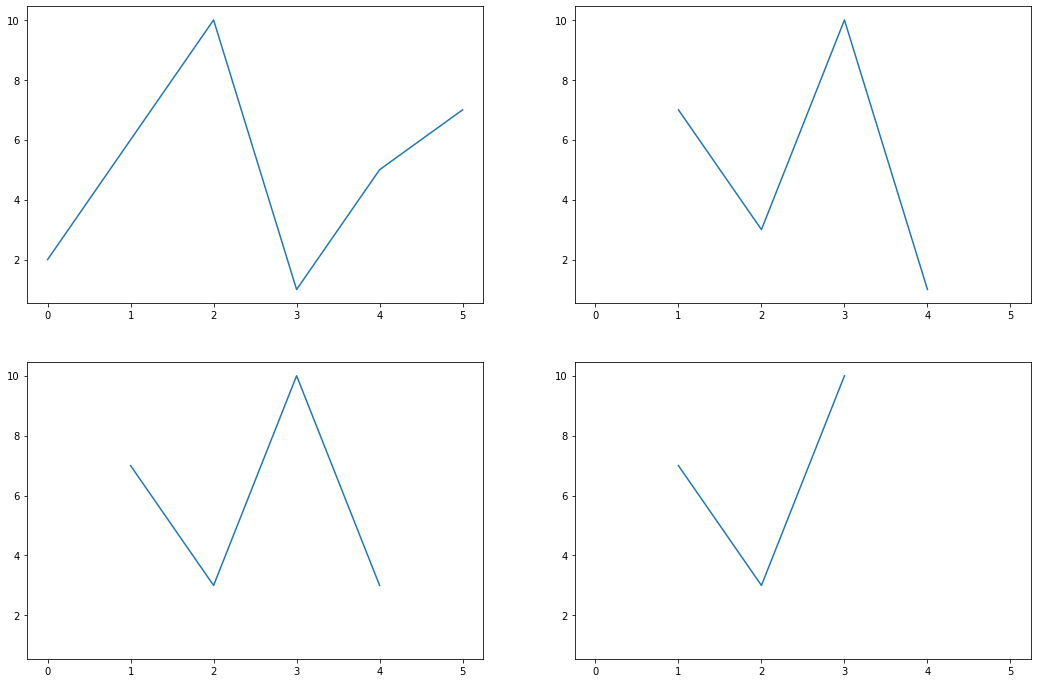

In [39]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
line1, = ax1.plot([2,6,10,1,5,7])


ax2 = fig.add_subplot(222)
line2, = ax2.plot([2,6,10,1,5,7])
line2.set_data([1,2,3,4],[7,3,10,1])

ax3 = fig.add_subplot(223)
line3, = ax3.plot([2,6,10,1,5,7])
line3.set_data([1,2,3,4],[7,3,10,3])

ax4 = fig.add_subplot(224)
line4, = ax4.plot([2,6,10,1,5,7])
line4.set_data([1,2,3],[7,3,10])

## drawstyle():画图时,点的连接方式
    {'default'，'steps'，'steps-pre'，'steps-mid'，'steps-post'}，default:'默认'

Text(0.5, 0.98, 'drawstyle: steps site')

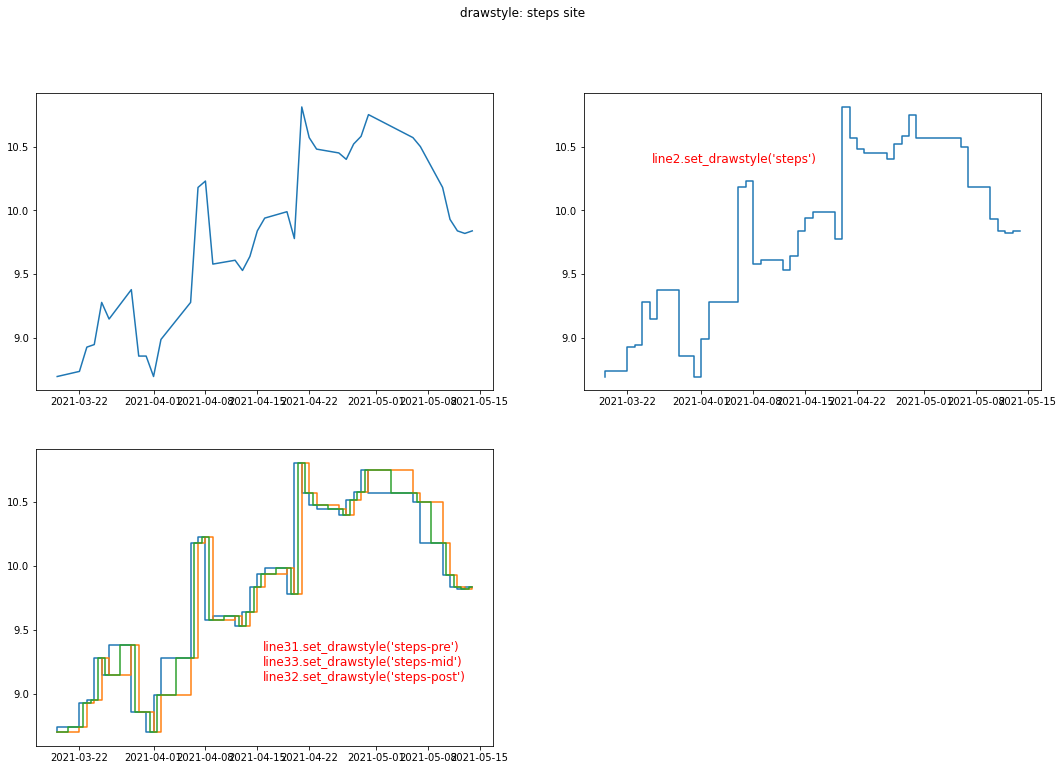

In [40]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
line1, = ax1.plot("open",data=data)

ax2 = fig.add_subplot(222)
line2, = ax2.plot("open",data=data)
line2.set_drawstyle("steps")
fig.text(s="line2.set_drawstyle('steps')",x=0.6,y=0.8,color='r',fontsize=12)

ax3 = fig.add_subplot(223)
line31, = ax3.plot("open",data=data)
line32, = ax3.plot("open",data=data)
line33, = ax3.plot("open",data=data)
line31.set_drawstyle("steps-pre")
line32.set_drawstyle("steps-post")
line33.set_drawstyle("steps-mid")
fig.text(s="line31.set_drawstyle('steps-pre')\nline33.set_drawstyle('steps-mid')\nline32.set_drawstyle('steps-post')",x=0.3,y=0.2,color='r',fontsize=12)

fig.suptitle("drawstyle: steps site")

## figure(): Set the Figure instance the artist belongs to.

## gid:

## in_layout:

## label:

## linestyle:

## linewidth:

## marker 相关
    1. maker:
    2. markeredgecolor/mec:
    3. markeredgewidth:
    4. markerfacecolor/mfc:
    5. markersize/ms:
    6. markervery
    7. fillstyle:设置标记填充样式
    8. markevery:marker的数量及方式

In [41]:
import matplotlib.dates as dates

#获取每月一日数据
monthdays = dates.MonthLocator()
#获取每周一的日期数据
mondays = dates.WeekdayLocator(dates.MONDAY)
#获取每日数据 
alldays = dates.DayLocator()

In [42]:
dt = data.copy()
dt["high"] = dt["high"] + 0.5
dt["low"] = dt["low"] - 0.5
dt = dt.head(10)

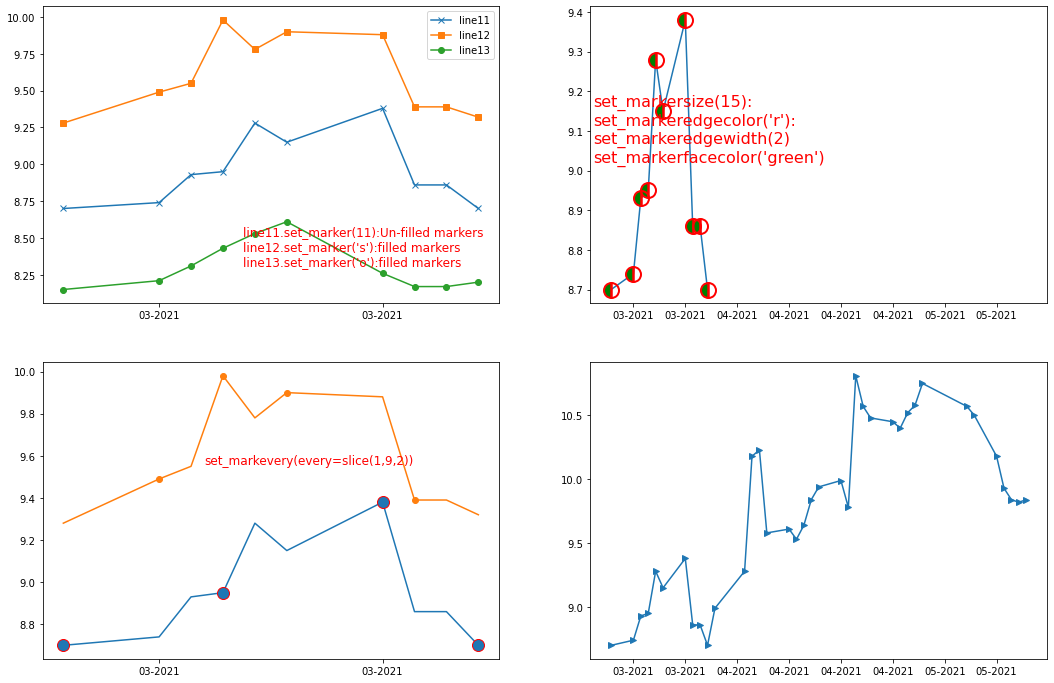

In [43]:

fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)

monthFormatter = dates.DateFormatter('%m-%Y') # 如：2-2015
dayFormatter = dates.DateFormatter('%d')          # 如：12

line11, = ax1.plot("open",data=dt,label="line11")
line12, = ax1.plot("high",data=dt,label="line12")
line13, = ax1.plot("low",data=dt,label="line13")
line11.set_marker("x")
line12.set_marker("s")
line13.set_marker("o")
ax1.legend()
fig.text(s="line11.set_marker(11):Un-filled markers\nline12.set_marker('s'):filled markers\nline13.set_marker('o'):filled markers",x=0.28,y=0.58,color="r",fontsize=12)


ax2 = fig.add_subplot(222)
line21, = ax2.plot("open",data=dt,label="line21",marker="o")
# line22, = ax2.plot("high",data=dt,label="line22",marker="o")
# line23, = ax2.plot("low",data=dt,label="line23",marker="o")
line21.set_markersize(15)
line21.set_markeredgecolor("r")
line21.set_markeredgewidth(2)
line21.set_markerfacecolor('green')
line21.set_fillstyle("left")


fig.text(s="set_markersize(15):\nset_markeredgecolor('r'):\nset_markeredgewidth(2)\nset_markerfacecolor('green')",
         x=0.55,y=0.7,color="r",fontsize=16)

ax3 = fig.add_subplot(223,sharex=ax1)
# ax3 = ax1.twinx()
line3, = ax3.plot("open",data=dt)
line31, = ax3.plot("high",data=dt,label="line22",marker="o")
line3.set_marker("o")
line3.set_markersize(12)
line3.set_markeredgecolor('r')    #or line.set_mec("r")
line3.set_markevery(every=3)
line31.set_markevery(every=slice(1,9,2))

fig.text(s="set_markevery(every=slice(1,9,2))",x=0.25,y=0.35,color="r",fontsize=12)

ax4 = fig.add_subplot(224,sharex=ax2)
# ax4 = ax2.twinx()
line4, = ax4.plot("open",data=data)
line4.set_marker(">")


#设置主刻度 即长刻度线
ax1.xaxis.set_major_locator(mondays)
ax2.xaxis.set_major_locator(mondays)
#设置主刻度格式
ax1.xaxis.set_major_formatter(monthFormatter)
ax2.xaxis.set_major_formatter(monthFormatter)


    markevery: every:
    every=None, every point will be plotted.
    every=N, every N-th marker will be plotted starting with marker 0.
    every=(start, N), every N-th marker, starting at point start, will be plotted.
    every=slice(start, end, N), every N-th marker, starting at point start, up to but not including point end, will be plotted.
    every=[i, j, m, n], only markers at points i, j, m, and n will be plotted.s1
    every=[True, False, True], positions that are True will be plotted.
    every=0.1, (i.e. a float) then markers will be spaced at approximately equal distances along the line; the distance along the line between markers is determined by multiplying the display-coordinate distance of the axes bounding-box diagonal by the value of every.
    every=(0.5, 0.1) (i.e. a length-2 tuple of float), the same functionality as every=0.1 is exhibited but the first marker will be 0.5 multiplied by the display-coordinate-diagonal-distance along the line.

In [44]:
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

### 未填充标记

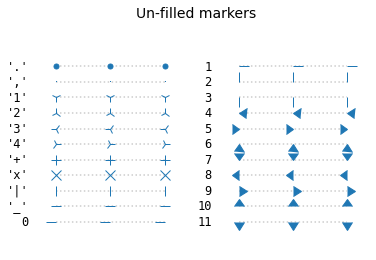

In [45]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

### 填充标记

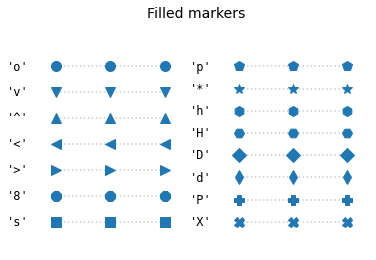

In [33]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

### 标记填充样式
    填充标记的边颜色和填充颜色可以单独指定。此外 fillstyle 可配置为在不同方向上未填充、完全填充或半填充。半填充样式使用 markerfacecoloralt 作为辅助填充颜色。

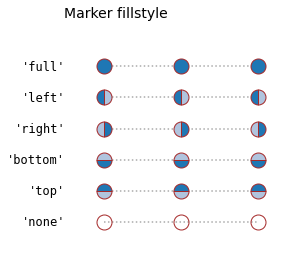

In [34]:
fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize=14)
fig.subplots_adjust(left=0.4)

filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)
format_axes(ax)

### 从TeX符号创建的标记
    使用 MathText ，使用自定义标记符号，例如 "$\u266B$" . 有关Stix字体符号的概述，请参阅 STIX font table . 也看到 STIX字体演示 .

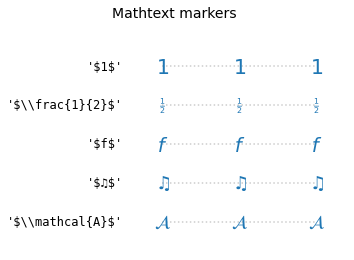

In [46]:
fig, ax = plt.subplots()
fig.suptitle('Mathtext markers', fontsize=14)
fig.subplots_adjust(left=0.4)

marker_style.update(markeredgecolor="None", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$", r"$\mathcal{A}$"]

for y, marker in enumerate(markers):
    # Escape dollars so that the text is written "as is", not as mathtext.
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

## picker:?

## pickradius:?

## rasterized:在矢量后端输出中强制栅格化（位图）绘图?

## sketch_params:设置草图参数

## snap:设置捕捉行为

## solid_capstyle(s):

Text(0.1, 0.1, 'Refre to solid_capstyle,dash_capstyle or capstyle params')

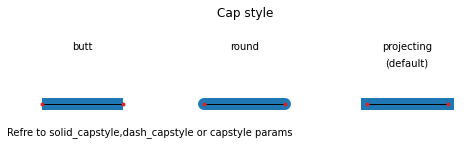

In [36]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.set_title('Cap style')

for x, style in enumerate(['butt', 'round', 'projecting']):
    ax.text(x+0.25, 1, style, ha='center')
    xx = [x, x+0.5]
    yy = [0, 0]
    ax.plot(xx, yy, lw=12, color='tab:blue', solid_capstyle=style)
    ax.plot(xx, yy, lw=1, color='black')
    ax.plot(xx, yy, 'o', color='tab:red', markersize=3)
ax.text(2.25, 0.7, '(default)', ha='center')

ax.set_ylim(-.5, 1.5)
ax.set_axis_off()
fig.text(s="Refre to solid_capstyle,dash_capstyle or capstyle params",x=0.1,y=0.1)

## solid_joinstyle:

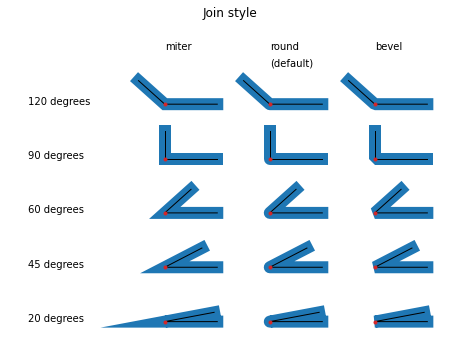

In [37]:
def plot_angle(ax, x, y, angle, style):
    phi = np.radians(angle)
    xx = [x + .5, x, x + .5*np.cos(phi)]
    yy = [y, y, y + .5*np.sin(phi)]
    ax.plot(xx, yy, lw=12, color='tab:blue', solid_joinstyle=style)
    ax.plot(xx, yy, lw=1, color='black')
    ax.plot(xx[1], yy[1], 'o', color='tab:red', markersize=3)


fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Join style')

for x, style in enumerate(['miter', 'round', 'bevel']):
    ax.text(x, 5, style)
    for y, angle in enumerate([20, 45, 60, 90, 120]):
        plot_angle(ax, x, y, angle, style)
        if x == 0:
            ax.text(-1.3, y, f'{angle} degrees')
ax.text(1, 4.7, '(default)')

ax.set_xlim(-1.5, 2.75)
ax.set_ylim(-.5, 5.5)
ax.set_axis_off()
plt.show()



## transform:	matplotlib.transforms.Transform

## url(url):添加超链接
    当视图被保存为svg格式时可用

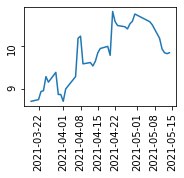

In [62]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(221)
line, = ax1.plot("open",data=data)
line.set_url(url="https://cn.bing.com/")
plt.savefig(r".\testoutput\url.svg")
plt.tick_params(labelrotation=90)

## visible(b):视图是否可见

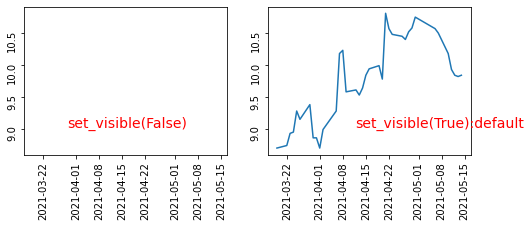

In [61]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
line1, = ax1.plot("open",data=data)
line1.set_visible(False)
fig.text(s="set_visible(False)",x=0.2,y=0.6,fontsize=14,color='r')
plt.tick_params(labelrotation=90)

ax2 = fig.add_subplot(222)
line, = ax2.plot("open",data=data)
line.set_visible(True)
fig.text(s="set_visible(True):default",x=0.7,y=0.6,fontsize=14,color='r')
plt.tick_params(labelrotation=90)

## xdata:

## ydata:

## zorder:

# Text属性
    text用法:
        ax.text(s='tst',x=float,y=float):   x,y值是Axes轴的坐标值
        fig.text(s='tst',x=float,y=float):  x,y值是figure坐标轴值,都是 0~1
        plt.text(s='tst',x=float,y=float):  x,y值是最近的一个Axes的坐标值
        
        plt.text(s='tst',x=float,y=float,fontsize=16):  利用**kwargs传入Text属性值:fontsize=16
        
        txt = plt.text(s='tst',x=float,y=float):  利用返回值
        txt.set_color('r'): 利用返回值,设置Text属性

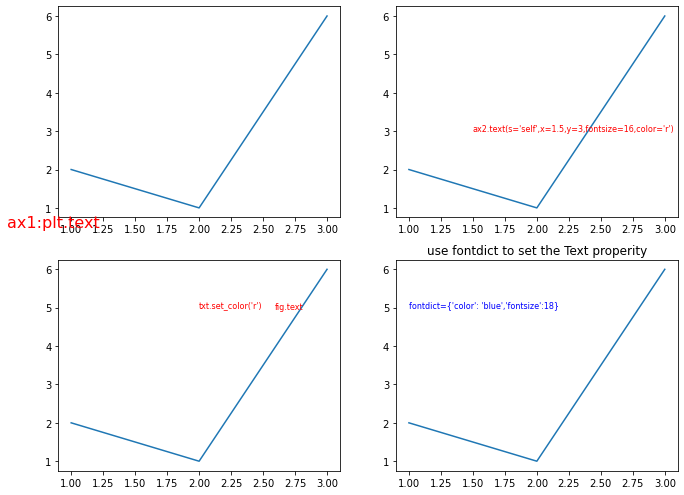

In [64]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
plt.text(s='ax1:plt.text',x=0.5,y=0.5,fontsize=16,color='r')
fig.text(s='fig.text',x=0.5,y=0.5,fontsize=8,color='r')

ax2 = fig.add_subplot(222)
ax2.plot([1,2,3],[2,1,6])
ax2.text(s="ax2.text(s='self',x=1.5,y=3,fontsize=16,color='r')",x=1.5,y=3,fontsize=8,color='r')


ax3 = fig.add_subplot(223)
ax3.plot([1,2,3],[2,1,6])
txt = plt.text(s="txt.set_color('r')",x=2,y=5,fontsize=8)
txt.set_color('r')

ax4 = fig.add_subplot(224)
ax4.plot([1,2,3],[2,1,6])
plt.text(s="fontdict={'color': 'blue','fontsize':18}",x=1,y=5,fontdict={'color': 'blue','fontsize':8})
ax4.set_title("use fontdict to set the Text properity")

plt.subplots_adjust(right=1.2,top=1.2)  #left, bottom, right, top

In [ ]:
# plt.text(x,y,s,fontdict=None,**kwargs):添加文本 s 到位置的轴 x ， y 在数据坐标中。
#     x,y: float : 放置文本的位置,默认情况下，这是在数据坐标中。坐标系可以使用 转型 参数。
#     s: str, 文本
#     fontdict:dict,default None; 用于替代默认文本属性的词典。如果fontdict为None，则默认值由 rcParams .
    
#     返回Text实例;
#     其他参数:Text属性

In [65]:
def txtplot(set=None,c='black'):
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(221)
    ax1.plot([1,2,3],[2,1,6])
    plt.text(s="Default",x=1.2,y=5.5,fontsize=16)

    ax2 = fig.add_subplot(222)
    ax2.plot([1,2,3],[2,1,6])
    txt = plt.text(s=set,x=1.2,y=5.5,fontsize=16,color=c)
    txt.set
    plt.show()

## agg_filter():一种过滤函数
    它接受一个（m，n，3）浮点数组和一个dpi值，并返回一个（m，n，3）数组。

## alpha: 透明度

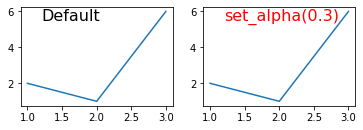

In [66]:
txtplot(set="set_alpha(0.3)",c='red')

## animated(b):设置Artist动画状态

## backgroundcolor:设置背景颜色

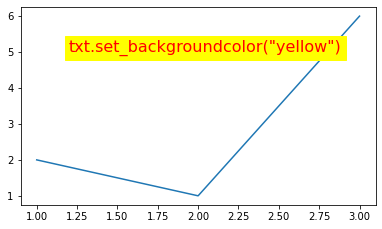

In [7]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s='txt.set_backgroundcolor("yellow")',x=1.2,y=5,fontsize=16,color='r')
txt.set_backgroundcolor("yellow")

## bbox:Draw a bounding box around self.
    
    dict with properties for patches.FancyBboxPatch
    
    t.set_bbox(dict(facecolor='red', alpha=0.5))

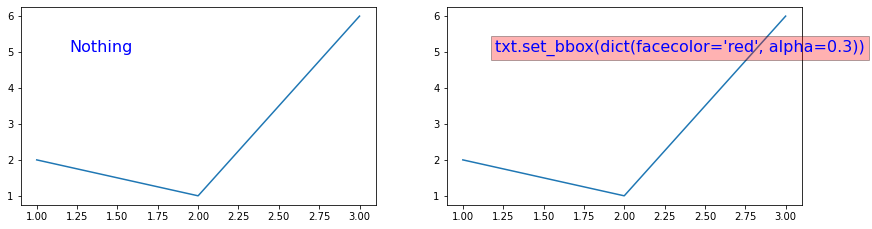

In [14]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s='Nothing',x=1.2,y=5,fontsize=16,color='blue')

ax2 = fig.add_subplot(222)
ax2.plot([1,2,3],[2,1,6])
txt = plt.text(s="txt.set_bbox(dict(facecolor='red', alpha=0.3))",x=1.2,y=5,fontsize=16,color='blue')
txt.set_bbox(dict(facecolor='red', alpha=0.3))

## clip_box(clipbox):设置Artist clip??
    clipbox:Bbox:box
    The default constructor takes the boundary "points" [[xmin, ymin], [xmax, ymax]].

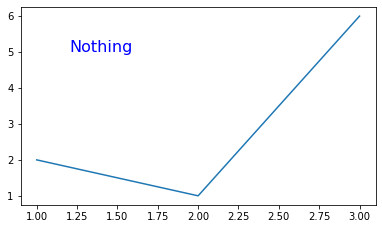

In [6]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s='Nothing',x=1.2,y=5,fontsize=16,color='blue')
# txt.set_clip_box([[2,2], [3, 7]])
# txt.set_clip_on(True)

## clip_path(path,transform=None):设置艺术家的剪辑路径
    pathPatch or Path or TransformedPath or None
        The clip path. If given a Path, transform must be provided as well. If None, a previously set clip path is removed.

    transformTransform, optional
        Only used if path is a Path, in which case the given Path is converted to a TransformedPath using transform.

## color/c:颜色

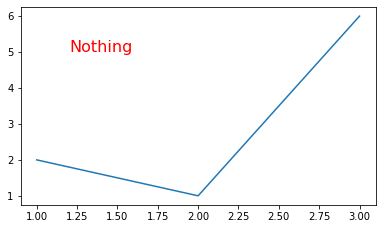

In [27]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s='Nothing',x=1.2,y=5,fontsize=16,color='blue')
txt.set_c('r')  #从新设置文本颜色

## contains(picker): 3.3版本已删除

## figure(fig):设置 Figure 艺术家所属的实例??

## fontfamily/family:字体设置
    {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    用法:
        1. plt.text(s="fontfamily='serif'",x=1.2,y=5.5,fontsize=16,color='blue',fontfamily='serif')
        2. txt = plt.text(s="fontfamily='serif'",x=1.2,y=5.5,fontsize=16,color='blue')
            txt.set_,fontfamily(fontname='serif')

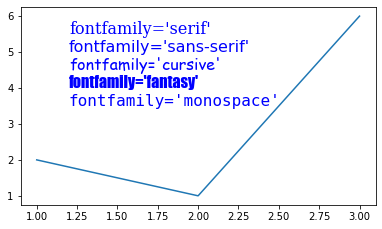

In [59]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
plt.text(s="fontfamily='serif'",x=1.2,y=5.5,fontsize=16,color='blue',fontfamily='serif')
plt.text(s="fontfamily='sans-serif'",x=1.2,y=5,fontsize=16,color='blue',fontfamily='sans-serif')
plt.text(s="fontfamily='cursive'",x=1.2,y=4.5,fontsize=16,color='blue',fontfamily='cursive')
plt.text(s="fontfamily='fantasy'",x=1.2,y=4,fontsize=16,color='blue',fontfamily='fantasy')
txt = plt.text(s="fontfamily='monospace'",x=1.2,y=3.5,fontsize=16,color='blue')
txt.set_fontfamily(fontname='monospace')

## fontproperties or font or font_properties:
    fp:
        font_manager.FontProperties;
        str;
        pathlib.Path;

In [ ]:
# class matplotlib.font_manager.FontProperties()
    # family: A list of font names in decreasing order of priority. The items may include a generic font family name, either 'sans-serif' (default), 'serif', 'cursive', 'fantasy', or 'monospace'. In that case, the actual font to be used will be looked up from the associated rcParam.
    # style: Either 'normal' (default), 'italic' or 'oblique'.
    # variant: Either 'normal' (default) or 'small-caps'.
    # stretch: A numeric value in the range 0-1000 or one of 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal' (default), 'semi-expanded', 'expanded', 'extra-expanded' or 'ultra-expanded'.
    # weight: A numeric value in the range 0-1000 or one of 'ultralight', 'light', 'normal' (default), 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'.
    # size: Either an relative value of 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large' or an absolute font size, e.g., 10 (default).
    # math_fontfamily: The family of fonts used to render math text; overrides rcParams["mathtext.fontset"] (default: 'dejavusans'). Supported values are the same as the ones supported by rcParams["mathtext.fontset"] (default: 'dejavusans'): 'dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans' and 'custom'.

In [63]:
from matplotlib import font_manager

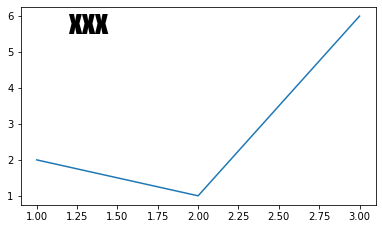

In [73]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s="xxx",x=1.2,y=5.5,fontsize=16)
txt.set_fontproperties(fp=font_manager.FontProperties(family="fantasy",style='italic',variant='small-caps',size=30))

In [ ]:
# str:如果是字符串,可以是:
1. font_manager.FontProperties(family="fantasy")family的参数;
2. 
    # If a str, it is interpreted as a fontconfig pattern parsed by FontProperties. If a pathlib.Path, it is interpreted as the absolute path to a font file.

findfont: Font family ['oblique'] not found. Falling back to DejaVu Sans.


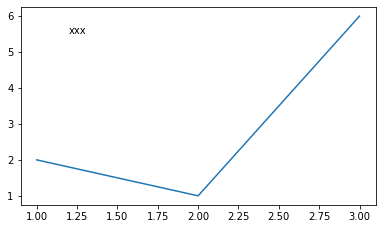

In [9]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s="xxx",x=1.2,y=5.5,fontsize=16)
txt.set_fontproperties(fp="oblique")

## fontsize:
    or size	float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}

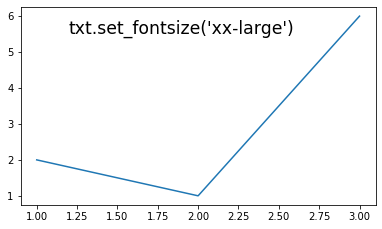

In [6]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s="txt.set_fontsize('xx-large')",x=1.2,y=5.5,fontsize=16)
txt.set_fontsize("xx-large")

## fontstretch or stretch:?
    {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}

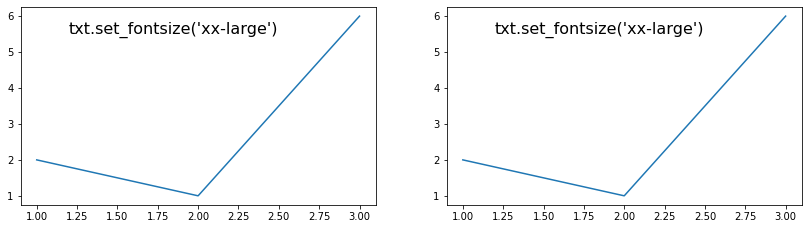

In [18]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt1 = plt.text(s="txt.set_fontsize('xx-large')",x=1.2,y=5.5,fontsize=16)
txt1.set_fontstretch(1000)

ax2 = fig.add_subplot(222)
ax2.plot([1,2,3],[2,1,6])
txt2 = plt.text(s="txt.set_fontsize('xx-large')",x=1.2,y=5.5,fontsize=16)
txt2.set_fontstretch(1000)

## fontstyle or style: 字体
    {'normal', 'italic', 'oblique'}
    更多字体见:
    matplotlib.font_manager.FontProperties.set_style

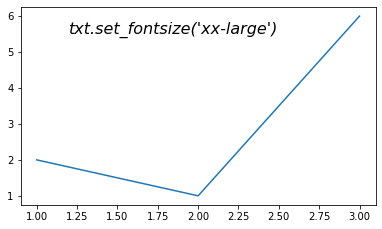

In [14]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s="txt.set_fontsize('xx-large')",x=1.2,y=5.5,fontsize=16)
txt.set_fontstyle("italic")

## fontvariant or variant: ?
    {'normal', 'small-caps'}

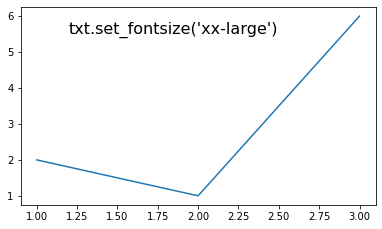

In [20]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
txt = plt.text(s="txt.set_fontsize('xx-large')",x=1.2,y=5.5,fontsize=16)
txt.set_fontvariant("normal")

## fontweight or weight:
    {a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}

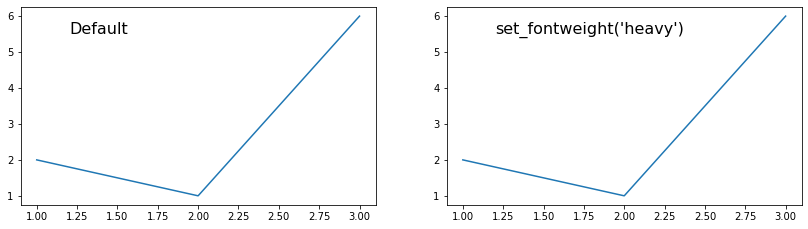

In [50]:
txtplot(set="set_fontweight('heavy')")

# Table属性

# patch属性
    https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyBboxPatch.html#matplotlib.patches.FancyBboxPatch

# 坐标轴刻度

## 数据类型:设置刻度间隔

In [ ]:
from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(1)
ax1.xaxis.set_major_locator(x_major_locator)

## 日期类型:设置周期间隔

In [76]:
import matplotlib.dates as dates

In [71]:
#获取每月一日数据
monthdays = dates.MonthLocator()
#获取每周一的日期数据
mondays = dates.WeekdayLocator(dates.MONDAY)
#获取每日数据 
alldays = dates.DayLocator()

mm = dates.MinuteLocator()

<Axes: xlabel='trade_date'>

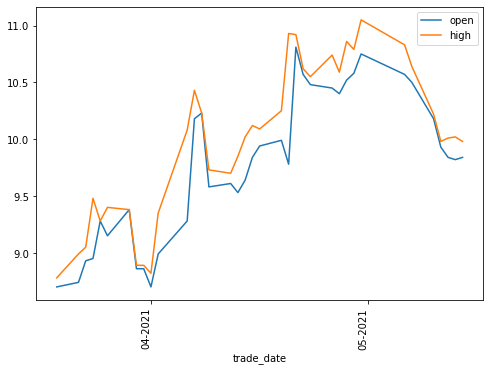

In [77]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

#设置主刻度 即长刻度线
ax.xaxis.set_major_locator(monthdays)
#设置副刻度 即短刻度线
# ax.xaxis.set_minor_locator(alldays)

monthFormatter = dates.DateFormatter('%m-%Y') # 如：2-2015
# dayFormatter = dates.DateFormatter('%d')          # 如：12
#设置主刻度格式
ax.xaxis.set_major_formatter(monthFormatter)

data[["open","high"]].plot(rot=90,ax=ax)

#自动调整xtick的间距
# fig.autofmt_xdate()

<ipython-input-73-ae1b0bb27911>:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(dates,y,linestyle='-',marker='')


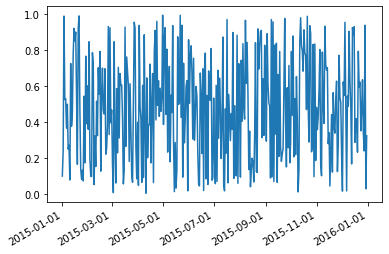

In [73]:
# 二、日期坐标轴刻度调整
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import datetime
fig=plt.figure()
start=datetime.datetime(2015,1,1)
stop=datetime.datetime(2016,1,1)
delta=datetime.timedelta(days=1)
dates=mpl.dates.drange(start,stop,delta)
y=np.random.rand(len(dates))
ax=plt.gca()
ax.plot_date(dates,y,linestyle='-',marker='')
date_format=mpl.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.show()

## 将x轴标签是字符串,将每一个刻度的标签都显示

In [79]:
dt = data.head(20)

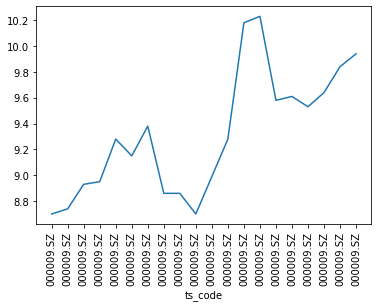

In [81]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

df = dt.set_index("ts_code")     #1. 将需要的x轴标签列设成行索引
df["open"].plot(ax=ax,rot=90)

xticks = list(range(dt.shape[0]))  #设定xticks数字标签
ax.set_xticks(xticks)

ax.set_xticklabels(dt["ts_code"])  #设定字符串标签,和xticks数字标签是对应的
plt.show()

In [82]:
xticks

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## 不显示坐标值

## 不显示坐标刻度